Importing pandas library

In [42]:
import pandas as pd

Loading the UNSW-NB15 training set and test one to work with them

In [43]:
train=pd.read_csv('UNSW_NB15_training-set.csv')
test=pd.read_csv('UNSW_NB15_testing-set.csv')

Performing exploratory data analysis (EDA) to gain insights into the dataset

At first we can check our data head to have a brief view of what we want to have a challenge with

In [44]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,1,0,0,0,1,1,0,Normal
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,1,2,0,0,0,1,6,0,Normal
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,1,3,0,0,0,2,6,0,Normal
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,1,3,1,1,0,2,1,0,Normal
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,2,1,40,0,0,0,2,39,0,Normal


In [45]:
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,1,2,0,0,0,1,2,0,Normal
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,1,2,0,0,0,1,2,0,Normal
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,1,3,0,0,0,1,3,0,Normal
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,2,1,3,0,0,0,2,3,0,Normal
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,2,1,3,0,0,0,2,3,0,Normal


As we can see, we have dash values in service column. So to convert it to NaN values which preprocessor functions can detect them, we have to perform needed activities. 

In [46]:
import numpy as np

train=train.replace('-', np.nan)
test=test.replace('-', np.nan)

print(train,test)

            id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp     NaN   FIN      6      4     258     172   
1            2  0.649902   tcp     NaN   FIN     14     38     734   42014   
2            3  1.623129   tcp     NaN   FIN      8     16     364   13186   
3            4  1.681642   tcp     ftp   FIN     12     12     628     770   
4            5  0.449454   tcp     NaN   FIN     10      6     534     268   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp     NaN   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm 

Overall view on data columns to see if there is a problem or not. In other words we can say evaluating preproccessing requirement by checking availability of null or missing data and also categorial ones which Machine learning models can't work with and handle them.

In [47]:
print(train.info()) 
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            81173 non-null   object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

More precise and apparent calculation and preview of the number of missing values in each column ,if it is available, by chaining of the .isnull() and .sum() methods.

In [48]:
print(train.isnull().sum())
print(test.isnull().sum())

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

As we saw, we have some missing values in the service column. So we have to settle this problem. According to our experiences, we have to remove this column from our data because if we want to fill it with constructed data, we need to fill more than half of it and it can't reach us to a real data.


But before the changing of objective features it is not bad to have an overview on them.

In [49]:
print(train.describe(include=['object'])) 

print()

print(test.describe(include=['object']))

         proto service   state attack_cat
count   175341   81173  175341     175341
unique     133      12       9         10
top        tcp     dns     INT     Normal
freq     79946   47294   82275      56000

        proto service  state attack_cat
count   82332   35179  82332      82332
unique    131      12      7         10
top       tcp     dns    FIN     Normal
freq    43095   21367  39339      37000


Service feature dropping

In [50]:
train=train.drop('service',axis=1)
test=test.drop('service',axis=1)

print(train,test)

            id       dur proto state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp   FIN      6      4     258     172   
1            2  0.649902   tcp   FIN     14     38     734   42014   
2            3  1.623129   tcp   FIN      8     16     364   13186   
3            4  1.681642   tcp   FIN     12     12     628     770   
4            5  0.449454   tcp   FIN     10      6     534     268   
...        ...       ...   ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp   INT      2      0     114       0   
175337  175338  0.505762   tcp   FIN     10      8     620     354   
175338  175339  0.000009   udp   INT      2      0     114       0   
175339  175340  0.000009   udp   INT      2      0     114       0   
175340  175341  0.000009   udp   INT      2      0     114       0   

                 rate  sttl  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
0           74.087490   252  ...                 1                 1   
1           78.

But it seems that the article didn't do this work. So if we wanted to keep it we could do this work (but I didn't apply it in my workspace)

In [51]:
# train['service']=train['service'].fillna(train['service'].mean())
# test['service']=test['service'].fillna(test['service'].mean())

One‑hot encoding to convert the object values to numerical form and make the entire dataset uniform for further usage.

NOTE: Before performing the One‑hot encoding, we need to calculate the number of values in the remained object columns, here means 'proto' and 'state', to confirming the transformation by hot encoder and also identifying any changes in equivalence between train and test datasets in this subject which if it happen, we have to settle it. 

In [52]:
train.proto.nunique()

133

In [54]:
test.proto.nunique()

131

So as it is observed, size of new test dataset will be different from train one and this difference must be equalibrized after our one_hot encoding

In [65]:
trp=set(train.proto.unique())
print(trp)

{'nvp', 'l2tp', 'iso-tp4', 'ptp', 'eigrp', 'pvp', 'sm', 'iso-ip', 'ipcomp', 'encap', 'mux', 'gre', 'crudp', 'sprite-rpc', 'tcp', 'ddx', 'cpnx', 'rdp', 'aris', 'visa', 'pgm', 'sat-mon', 'micp', 'etherip', 'mtp', 'uti', 'mobile', 'wsn', 'bbn-rcc', 'trunk-1', 'compaq-peer', 'xtp', 'ospf', 'xnet', 'qnx', 'ax.25', 'any', 'bna', 'ipv6-frag', 'idrp', 'wb-mon', 'ipv6', 'ggp', 'pipe', 'vines', 'sccopmce', 'egp', 'udp', 'i-nlsp', 'pim', 'tp++', 'narp', 'sps', 'gmtp', 'iatp', 'ifmp', 'chaos', 'rsvp', 'icmp', 'st2', 'rvd', 'tlsp', 'cbt', 'vrrp', 'skip', 'leaf-1', 'wb-expak', 'cphb', 'fc', 'smp', '3pc', 'mhrp', 'igp', 'stp', 'kryptolan', 'ipcv', 'emcon', 'dcn', 'a/n', 'il', 'ipx-n-ip', 'netblt', 'isis', 'unas', 'pnni', 'idpr', 'aes-sp3-d', 'secure-vmtp', 'br-sat-mon', 'igmp', 'ipv6-opts', 'argus', 'ipv6-route', 'pup', 'sun-nd', 'fire', 'prm', 'dgp', 'ip', 'scps', 'rtp', 'mfe-nsp', 'ipv6-no', 'ipip', 'hmp', 'vmtp', 'sctp', 'merit-inp', 'cftp', 'zero', 'ib', 'trunk-2', 'xns-idp', 'leaf-2', 'arp', 'ir

In [66]:
tsp=set(test.proto.unique())
print(tsp)

{'nvp', 'l2tp', 'iso-tp4', 'ptp', 'eigrp', 'pvp', 'sm', 'iso-ip', 'ipcomp', 'encap', 'mux', 'gre', 'crudp', 'sprite-rpc', 'tcp', 'ddx', 'cpnx', 'rdp', 'aris', 'visa', 'pgm', 'sat-mon', 'micp', 'etherip', 'mtp', 'uti', 'mobile', 'wsn', 'bbn-rcc', 'trunk-1', 'compaq-peer', 'xtp', 'ospf', 'xnet', 'qnx', 'any', 'ax.25', 'bna', 'ipv6-frag', 'idrp', 'wb-mon', 'ipv6', 'ggp', 'pipe', 'vines', 'sccopmce', 'egp', 'udp', 'i-nlsp', 'pim', 'tp++', 'narp', 'sps', 'gmtp', 'iatp', 'ifmp', 'chaos', 'rsvp', 'st2', 'rvd', 'tlsp', 'cbt', 'vrrp', 'skip', 'leaf-1', 'cphb', 'wb-expak', 'fc', 'smp', '3pc', 'mhrp', 'igp', 'stp', 'kryptolan', 'ipcv', 'emcon', 'dcn', 'a/n', 'il', 'ipx-n-ip', 'netblt', 'isis', 'unas', 'pnni', 'idpr', 'aes-sp3-d', 'secure-vmtp', 'br-sat-mon', 'igmp', 'ipv6-opts', 'argus', 'ipv6-route', 'pup', 'sun-nd', 'fire', 'prm', 'ip', 'hmp', 'dgp', 'mfe-nsp', 'ipip', 'ipv6-no', 'scps', 'vmtp', 'sctp', 'merit-inp', 'trunk-2', 'cftp', 'zero', 'ib', 'xns-idp', 'leaf-2', 'arp', 'irtp', 'iplt', 'l

Identification of the different variables among them

In [67]:
proto_df1=trp-tsp
print(proto_df1)

{'rtp', 'icmp'}


In [73]:
proto_df2=tsp-trp
print(proto_df2)

set()


In [68]:
train.state.nunique()


9

In [69]:
test.state.nunique()


7

So, state feature also include different amount of variables between train and test dataset which we have to explore their condition.

In [70]:
trs=set(train.state.unique())
print(trs)

{'URN', 'FIN', 'ECO', 'no', 'PAR', 'CON', 'RST', 'INT', 'REQ'}


In [71]:
tss=set(test.state.unique())
print(tss)

{'FIN', 'CLO', 'ACC', 'CON', 'RST', 'INT', 'REQ'}


Identification of the different variables among them

In [72]:
state_df1=trs-tss
print(state_df1)

{'ECO', 'no', 'URN', 'PAR'}


In [74]:
state_df2=tss-trs
print(state_df2)

{'ACC', 'CLO'}


In [32]:
from sklearn.preprocessing import OneHotEncoder

converter=OneHotEncoder()

converted_train=converter.fit_transform(train[['proto','state']]).toarray()
new_train=pd.DataFrame(converted_train, columns=converter.get_feature_names(['proto','state']))

print(new_train)

        proto_3pc  proto_a/n  proto_aes-sp3-d  proto_any  proto_argus  \
0             0.0        0.0              0.0        0.0          0.0   
1             0.0        0.0              0.0        0.0          0.0   
2             0.0        0.0              0.0        0.0          0.0   
3             0.0        0.0              0.0        0.0          0.0   
4             0.0        0.0              0.0        0.0          0.0   
...           ...        ...              ...        ...          ...   
175336        0.0        0.0              0.0        0.0          0.0   
175337        0.0        0.0              0.0        0.0          0.0   
175338        0.0        0.0              0.0        0.0          0.0   
175339        0.0        0.0              0.0        0.0          0.0   
175340        0.0        0.0              0.0        0.0          0.0   

        proto_aris  proto_arp  proto_ax.25  proto_bbn-rcc  proto_bna  ...  \
0              0.0        0.0          0.0    

c:\Users\Amin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


As we can see, total number of columns which we achieved in the last part is equal to the sum of values which were available in the goal columns (133+9=142)

Removing the object shaped proto and state features values and concatening the new proto and state columns in shape of our new dataframe to the previous training set instead

In [33]:
train=train.drop(columns=['proto','state'])
train=pd.concat([train,new_train], axis = 1)
print(train)

            id       dur  spkts  dpkts  sbytes  dbytes           rate  sttl  \
0            1  0.121478      6      4     258     172      74.087490   252   
1            2  0.649902     14     38     734   42014      78.473372    62   
2            3  1.623129      8     16     364   13186      14.170161    62   
3            4  1.681642     12     12     628     770      13.677108    62   
4            5  0.449454     10      6     534     268      33.373826   254   
...        ...       ...    ...    ...     ...     ...            ...   ...   
175336  175337  0.000009      2      0     114       0  111111.107200   254   
175337  175338  0.505762     10      8     620     354      33.612649   254   
175338  175339  0.000009      2      0     114       0  111111.107200   254   
175339  175340  0.000009      2      0     114       0  111111.107200   254   
175340  175341  0.000009      2      0     114       0  111111.107200   254   

        dttl         sload  ...  proto_zero  state_

One_hot encoding for test data

In [36]:
converted_test=converter.fit_transform(test[['proto','state']]).toarray()
new_test=pd.DataFrame(converted_test, columns=converter.get_feature_names(['proto','state']))

print(new_test)

       proto_3pc  proto_a/n  proto_aes-sp3-d  proto_any  proto_argus  \
0            0.0        0.0              0.0        0.0          0.0   
1            0.0        0.0              0.0        0.0          0.0   
2            0.0        0.0              0.0        0.0          0.0   
3            0.0        0.0              0.0        0.0          0.0   
4            0.0        0.0              0.0        0.0          0.0   
...          ...        ...              ...        ...          ...   
82327        0.0        0.0              0.0        0.0          0.0   
82328        0.0        0.0              0.0        0.0          0.0   
82329        0.0        0.0              0.0        0.0          0.0   
82330        0.0        0.0              0.0        0.0          0.0   
82331        0.0        0.0              0.0        0.0          0.0   

       proto_aris  proto_arp  proto_ax.25  proto_bbn-rcc  proto_bna  ...  \
0             0.0        0.0          0.0            0.0   

c:\Users\Amin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Removing the object shaped proto and state features values and concatening the new proto and state columns in shape of our new dataframe to the previous test set instead

In [37]:
test=test.drop(columns=['proto','state'])
test=pd.concat([test,new_test], axis = 1)
print(test)

          id       dur  spkts  dpkts  sbytes  dbytes           rate  sttl  \
0          1  0.000011      2      0     496       0   90909.090200   254   
1          2  0.000008      2      0    1762       0  125000.000300   254   
2          3  0.000005      2      0    1068       0  200000.005100   254   
3          4  0.000006      2      0     900       0  166666.660800   254   
4          5  0.000010      2      0    2126       0  100000.002500   254   
...      ...       ...    ...    ...     ...     ...            ...   ...   
82327  82328  0.000005      2      0     104       0  200000.005100   254   
82328  82329  1.106101     20      8   18062     354      24.410067   254   
82329  82330  0.000000      1      0      46       0       0.000000     0   
82330  82331  0.000000      1      0      46       0       0.000000     0   
82331  82332  0.000009      2      0     104       0  111111.107200   254   

       dttl         sload  ...  proto_xns-idp  proto_xtp  proto_zero  \
0  

Now we can have a purely descriptive information about the dataset by describe command. This information includes statistics that especially summarize the central tendency of the variables and their dispersion. As we can see, it provided values such as count, mean or min-Max.

NOTE: Because these calculations were not sensible for 'id' column, for this section, it was dropped out. But objects problem was handled by this function itself and they were not included in the default mode.

In [38]:
train=train.drop(columns='id')
print(train.describe()) 

print() #a space for having a better view on these two different parts of data

test=test.drop(columns='id')
print(test.describe())

                 dur          spkts          dpkts        sbytes  \
count  175341.000000  175341.000000  175341.000000  1.753410e+05   
mean        1.359389      20.298664      18.969591  8.844844e+03   
std         6.480249     136.887597     110.258271  1.747656e+05   
min         0.000000       1.000000       0.000000  2.800000e+01   
25%         0.000008       2.000000       0.000000  1.140000e+02   
50%         0.001582       2.000000       2.000000  4.300000e+02   
75%         0.668069      12.000000      10.000000  1.418000e+03   
max        59.999989    9616.000000   10974.000000  1.296523e+07   

             dbytes          rate           sttl           dttl         sload  \
count  1.753410e+05  1.753410e+05  175341.000000  175341.000000  1.753410e+05   
mean   1.492892e+04  9.540619e+04     179.546997      79.609567  7.345403e+07   
std    1.436542e+05  1.654010e+05     102.940011     110.506863  1.883574e+08   
min    0.000000e+00  0.000000e+00       0.000000       0.000000

# Visualizing the distributions of different features and exploring patterns

NOTE: These charts were so more undrestandable and easier to analysis before transforming object features to numeric ones and concatenate them to the primary datasets. It means that added large size converted data columns got much space and affected the quality of diagrams.  

For this part I tried a few different plotting methods such as histogram, box plot and heatmap to see variety of visualization views which we can apply on our data. 

At first I looked at histogram to plot the frequency distribution of the feature values which will show us how often each value occurs in the dataset.

My goal was to plot it in a single compact chart which include all the data so it definitely would more touchable instant view on our goal visualization. But as I didn't find any attainable option to achieve this goal, even by searching on the net!, inevitably I tried many and maybe any possible ways to reach a better insight on the data here by using this method. 

In the beginning attempt, I tried to achieve my goal in the very first strike! I prepared all the assumed needed details to have a complete solitary chart. But maybe from my bad chance or because of the more important reason, deficiency of hist function options or at least its low accessibility to use, after dedicating so much time on it, I didn't succeed to make any acceptable chart, even from my view. Because they had many interferences in details of subplots, especially their names!, which had made viewing and analyzing them so hard for the audience. 
It is needed to remember that according to the things that I said, I tried to make free spaces between the subplots to have a convenient observation of them but I didn't find any related parameter in this function to achieve a more favorable plot.

NOTE: Because of the awful representation of that plot, I removed that completely but if you want to know about that, I have to say that it was a simply product of 'train.hist' command but with a few tried changes in its defaults. But as I said before, it has'nt any reliable option in itself!

Even I tried plotting each feature histogram with its special command but as subplots of a main plotting command to have a more structured collection and easier to look and analyse one, But same as the previous way, but a liitle better, It didin't worked as well as what was needed. The main visible problem which I mean is long names of features that it seems we have'nt any control on size of them and they cause interference in other ones and lower the resolution of plot.

NOTE: To saving time, here I only checked from trainset

NOTE: This chart is made for brief view along with the next one which is the complete and obvious form. 

C:\Users\Amin\AppData\Local\Temp\ipykernel_11056\2300314433.py:184: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


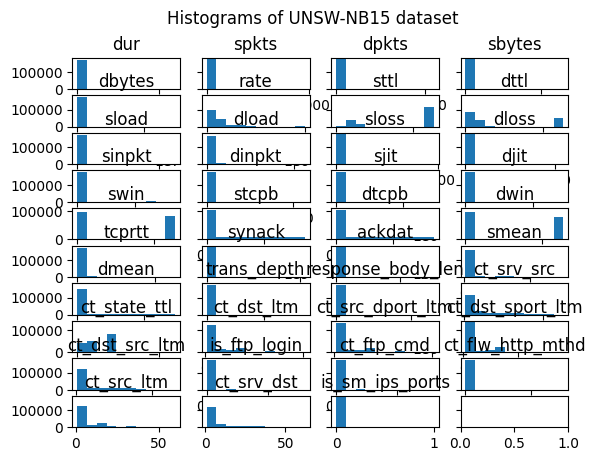

In [39]:
import matplotlib.pyplot as plt

#creating subplots
fig,axs=plt.subplots(nrows=10, ncols=4, sharey='row')

...
#train_plot=train.drop(columns='attack_cat')

#Iterating over the columns and create separate histogram plots

#training set plot
# count=0
# for m in range(10):
#     for n in range(4):
#         axs[m, n].hist(train_plot.columns[count])
#         plt.title(train_plot.columns[count])
        
#         count+=1

#above way did'nt worked well and its chart was not as well as possible. So inevitably I used the below way to have a single compact one.
...

#1
axs[0, 0].hist(train['dur'])
axs[0, 0].set_title('dur')

#2
axs[0, 1].hist(train['spkts'])
axs[0, 1].set_title('spkts')

#3
axs[0, 2].hist(train['dpkts'])
axs[0, 2].set_title('dpkts')

#4
axs[0, 3].hist(train['sbytes'])
axs[0, 3].set_title('sbytes')

#5
axs[1, 0].hist(train['dbytes'])
axs[1, 0].set_title('dbytes')

#6
axs[1, 1].hist(train['rate'])
axs[1, 1].set_title('rate')

#7
axs[1, 2].hist(train['sttl'])
axs[1, 2].set_title('sttl')

#8
axs[1, 3].hist(train['dttl'])
axs[1, 3].set_title('dttl')

#9
axs[2, 0].hist(train['sload'])
axs[2, 0].set_title('sload')

#10
axs[2, 1].hist(train['dload'])
axs[2, 1].set_title('dload')

#11
axs[2, 2].hist(train['sloss'])
axs[2, 2].set_title('sloss')

#12
axs[2, 3].hist(train['dloss'])
axs[2, 3].set_title('dloss')

#13
axs[3, 0].hist(train['sinpkt'])
axs[3, 0].set_title('sinpkt')

#14
axs[3, 1].hist(train['dinpkt'])
axs[3, 1].set_title('dinpkt')

#15
axs[3, 2].hist(train['sjit'])
axs[3, 2].set_title('sjit')

#16
axs[3, 3].hist(train['djit'])
axs[3, 3].set_title('djit')

#17
axs[4, 0].hist(train['swin'])
axs[4, 0].set_title('swin')

#18
axs[4, 1].hist(train['stcpb'])
axs[4, 1].set_title('stcpb')

#19
axs[4, 2].hist(train['dtcpb'])
axs[4, 2].set_title('dtcpb')

#20
axs[4, 3].hist(train['dwin'])
axs[4, 3].set_title('dwin')

#21
axs[5, 0].hist(train['tcprtt'])
axs[5, 0].set_title('tcprtt')

#22
axs[5, 1].hist(train['synack'])
axs[5, 1].set_title('synack')

#23
axs[5, 2].hist(train['ackdat'])
axs[5, 2].set_title('ackdat')

#24
axs[5, 3].hist(train['smean'])
axs[5, 3].set_title('smean')

#25
axs[6, 0].hist(train['dmean'])
axs[6, 0].set_title('dmean')

#26
axs[6, 1].hist(train['trans_depth'])
axs[6, 1].set_title('trans_depth')

#27
axs[6, 2].hist(train['response_body_len'])
axs[6, 2].set_title('response_body_len')

#28
axs[6, 3].hist(train['ct_srv_src'])
axs[6, 3].set_title('ct_srv_src')

#29
axs[7, 0].hist(train['ct_state_ttl'])
axs[7, 0].set_title('ct_state_ttl')

#30
axs[7, 1].hist(train['ct_dst_ltm'])
axs[7, 1].set_title('ct_dst_ltm')

#31
axs[7, 2].hist(train['ct_src_dport_ltm'])
axs[7, 2].set_title('ct_src_dport_ltm')

#32
axs[7, 3].hist(train['ct_dst_sport_ltm'])
axs[7, 3].set_title('ct_dst_sport_ltm')

#33
axs[8, 0].hist(train['ct_dst_src_ltm'])
axs[8, 0].set_title('ct_dst_src_ltm')

#34
axs[8, 1].hist(train['is_ftp_login'])
axs[8, 1].set_title('is_ftp_login')

#35
axs[8, 2].hist(train['ct_ftp_cmd'])
axs[8, 2].set_title('ct_ftp_cmd')

#36
axs[8, 3].hist(train['ct_flw_http_mthd'])
axs[8, 3].set_title('ct_flw_http_mthd')

#37
axs[9, 0].hist(train['ct_src_ltm'])
axs[9, 0].set_title('ct_src_ltm')

#38
axs[9, 1].hist(train['ct_srv_dst'])
axs[9, 1].set_title('ct_srv_dst')

#39
axs[9, 2].hist(train['is_sm_ips_ports'])
axs[9, 2].set_title('is_sm_ips_ports')

##4 others are object not numeric ones


#adding overall title and adjust spacing
plt.suptitle('Histograms of UNSW-NB15 dataset')
plt.tight_layout()

# show plot
plt.show()

And this last histogram plotting way was performed to show the diagrams in a more observable scale.

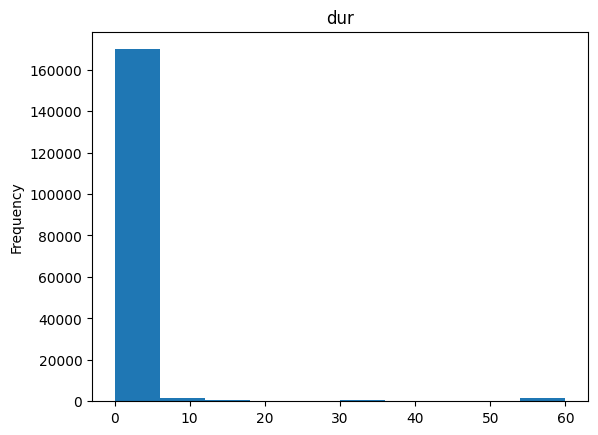

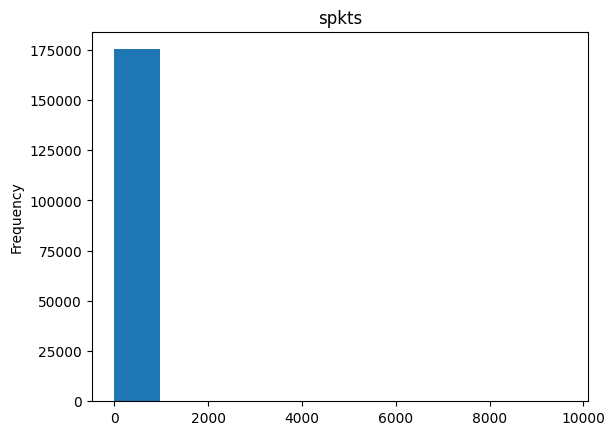

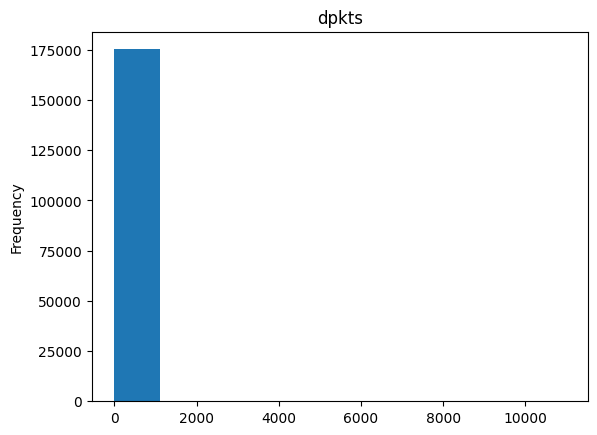

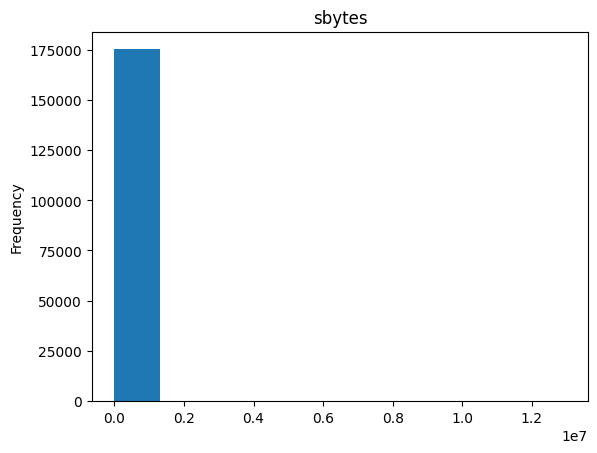

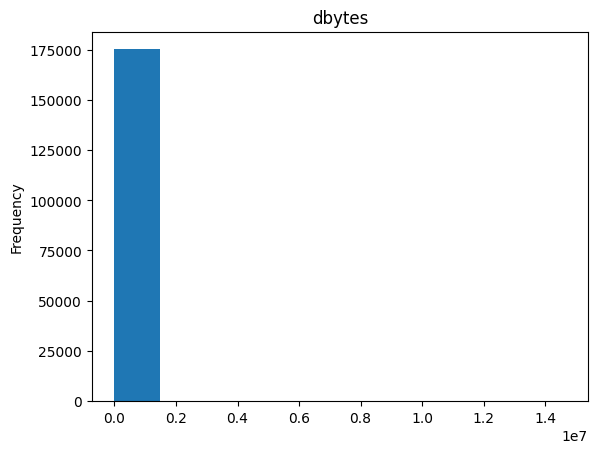

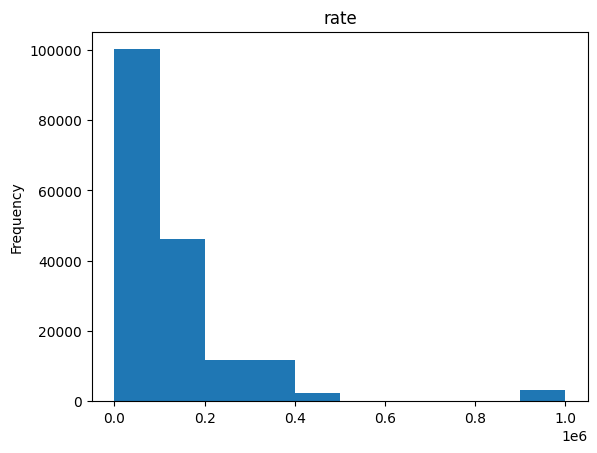

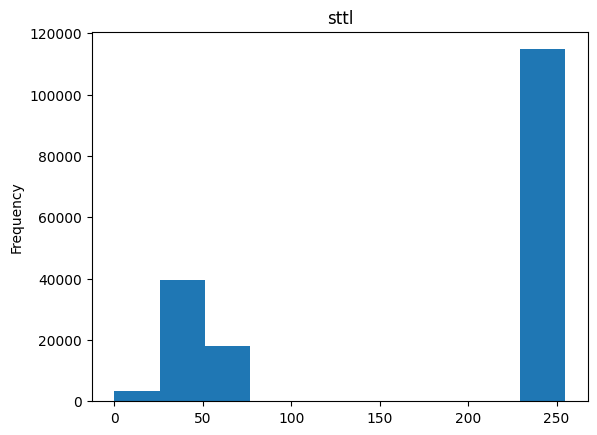

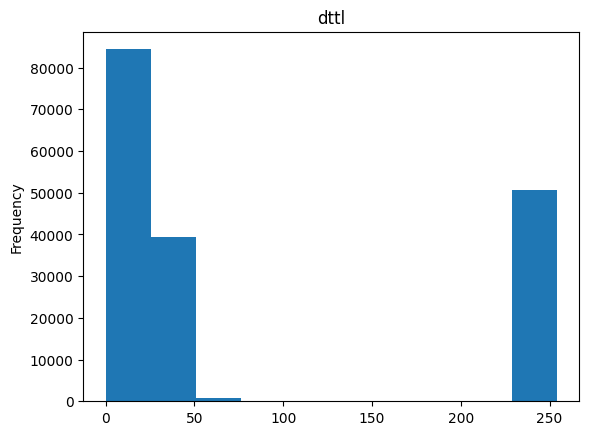

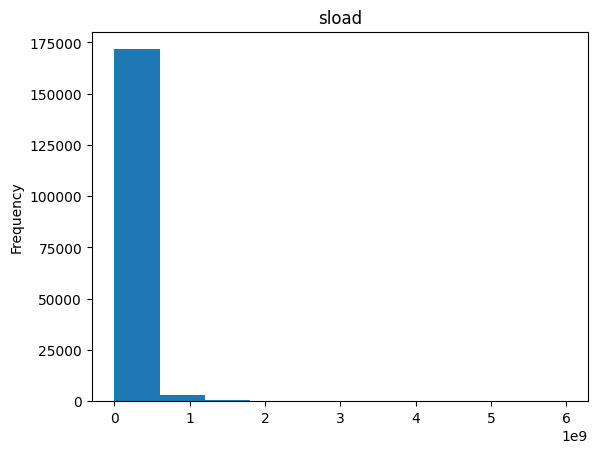

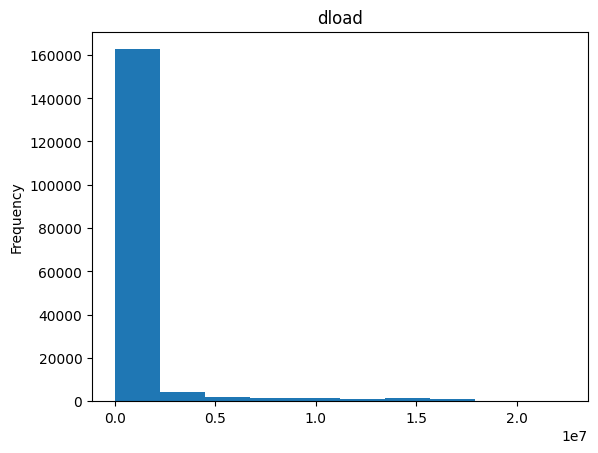

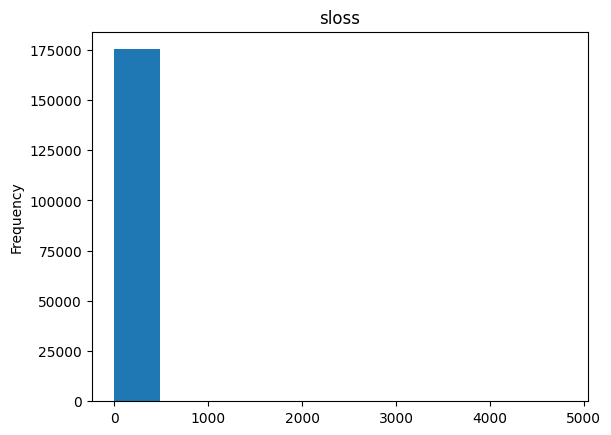

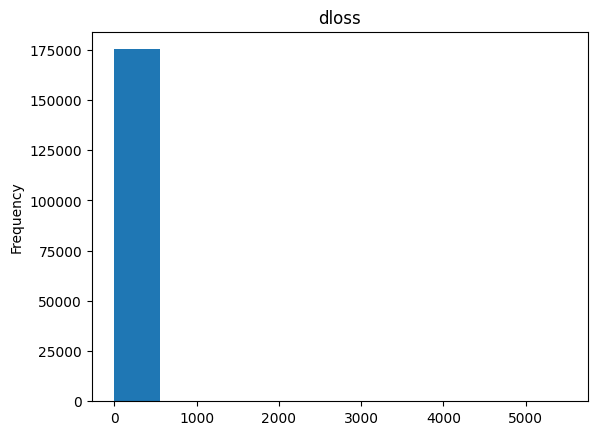

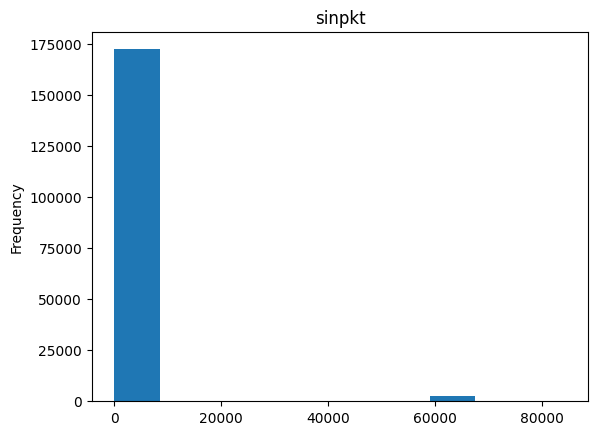

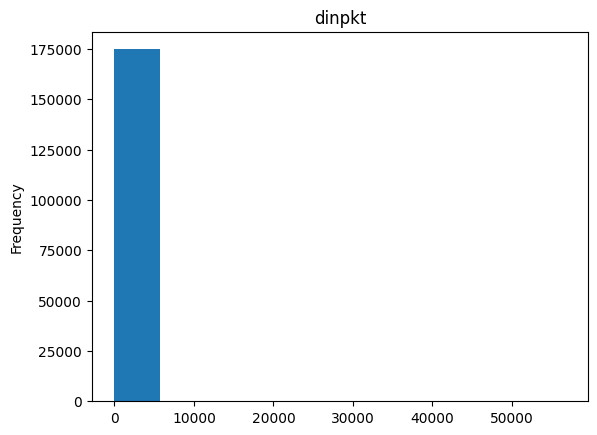

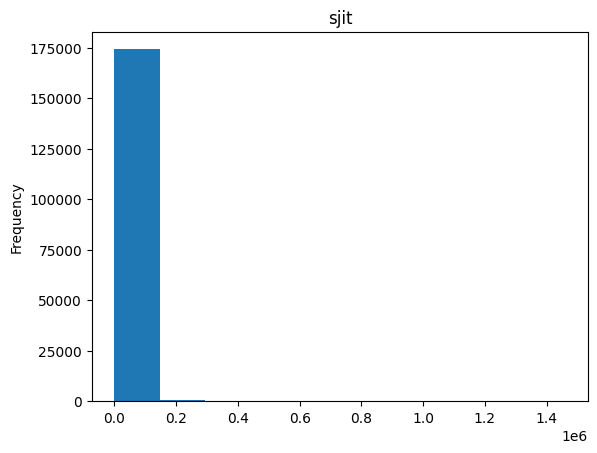

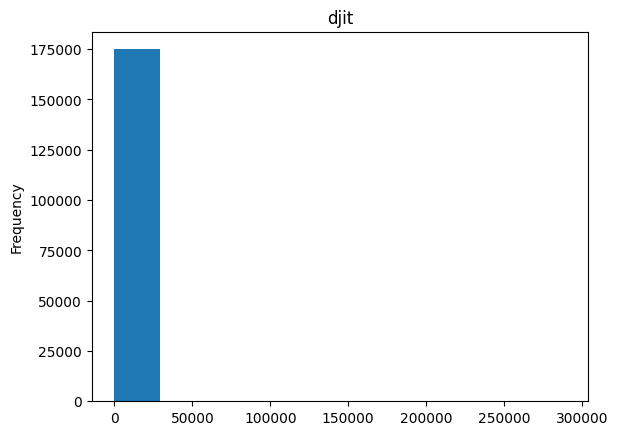

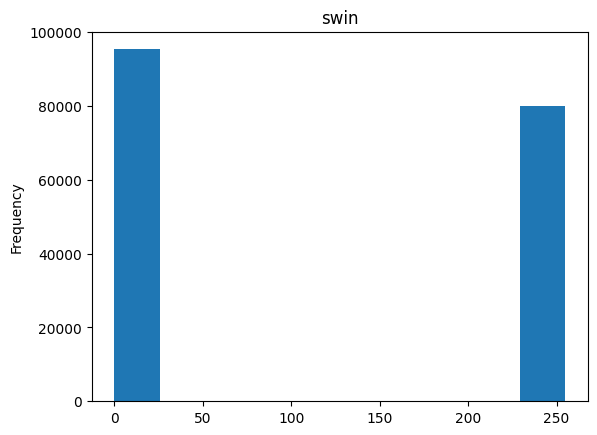

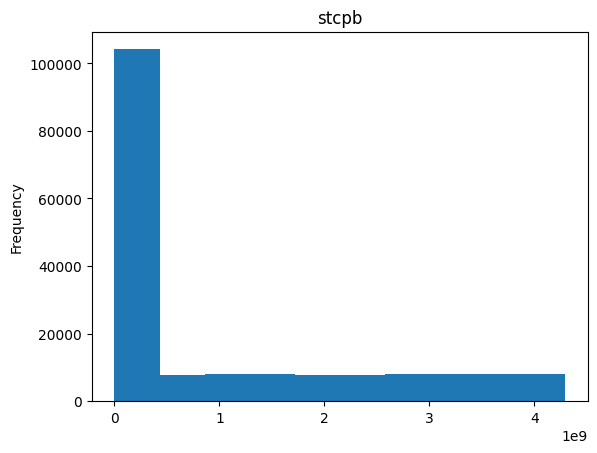

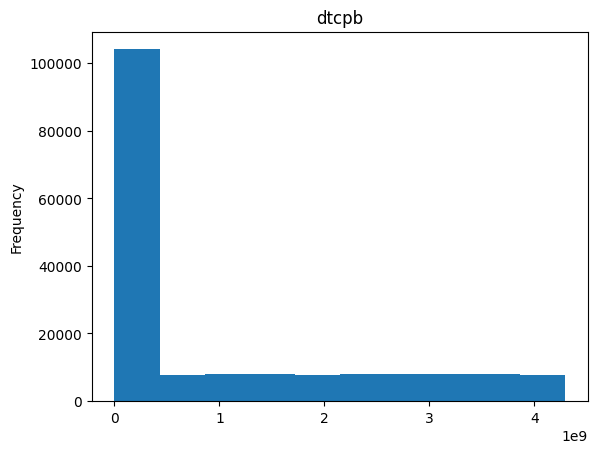

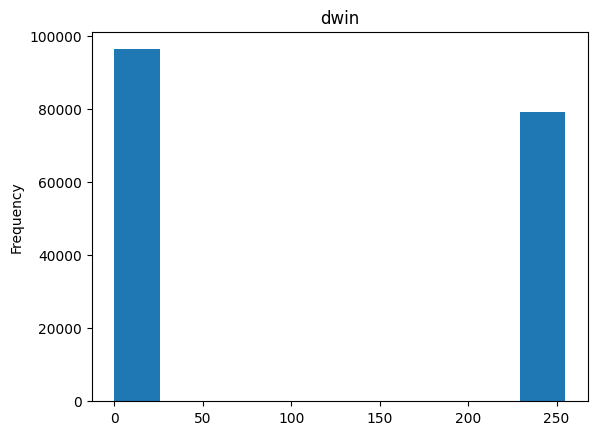

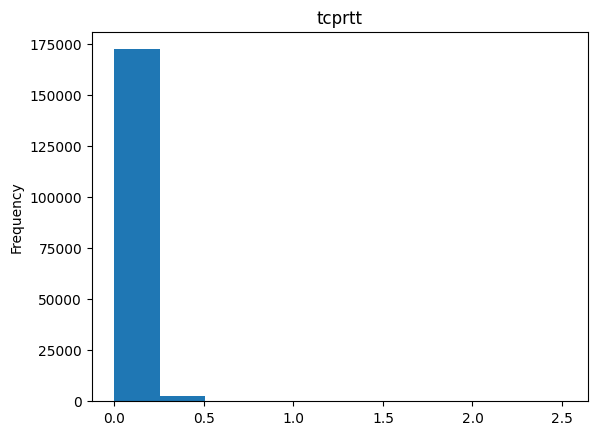

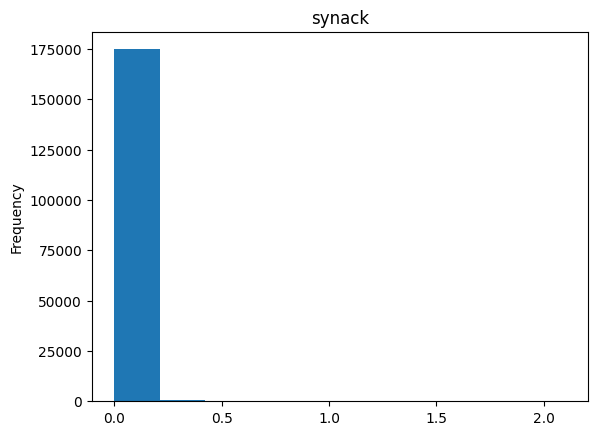

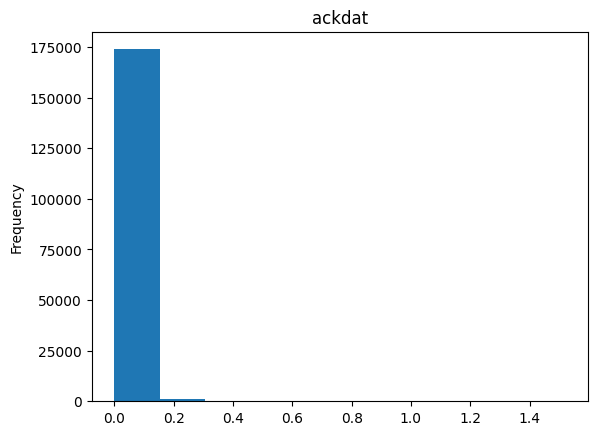

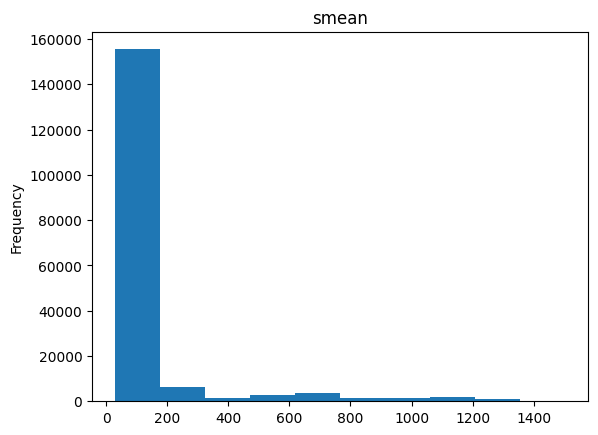

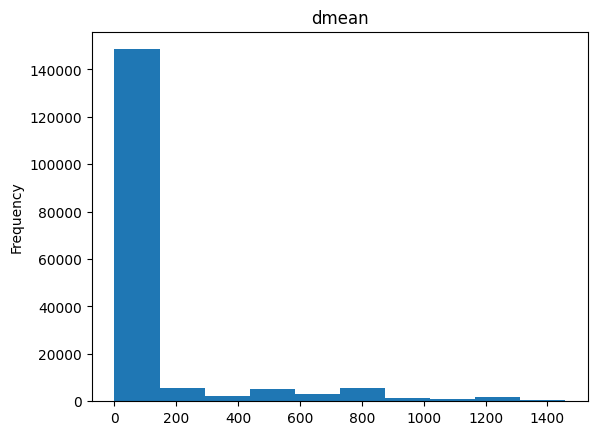

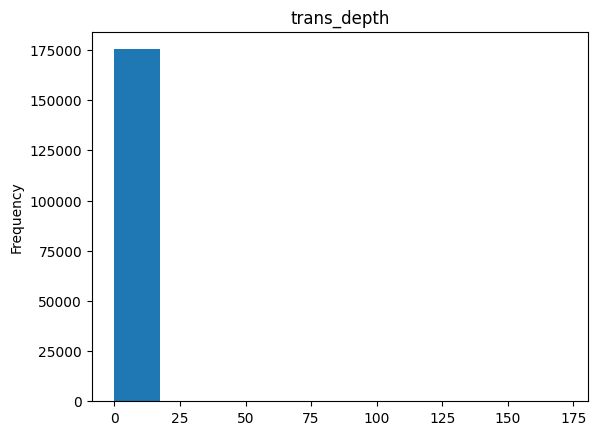

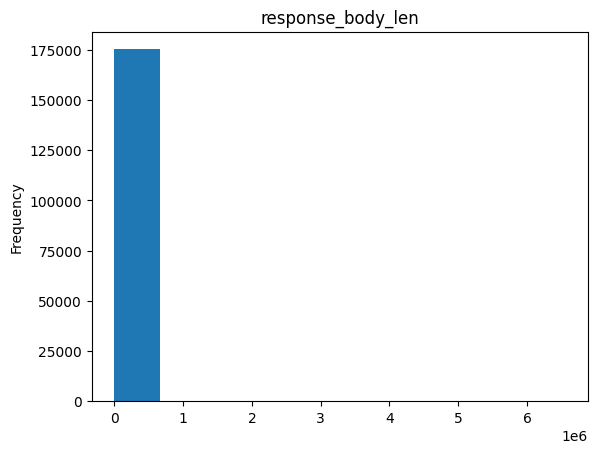

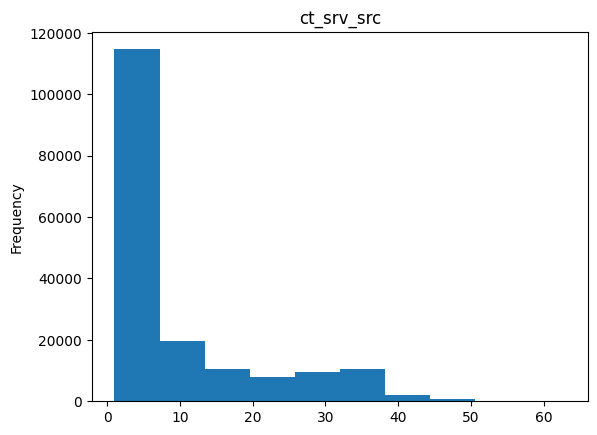

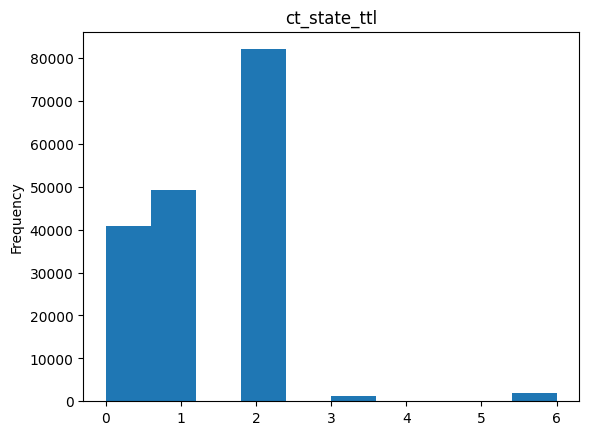

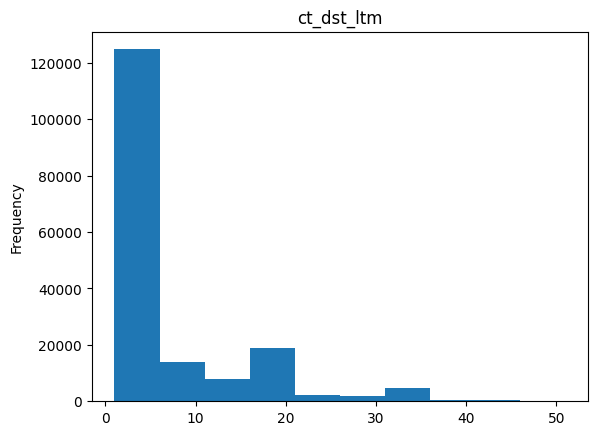

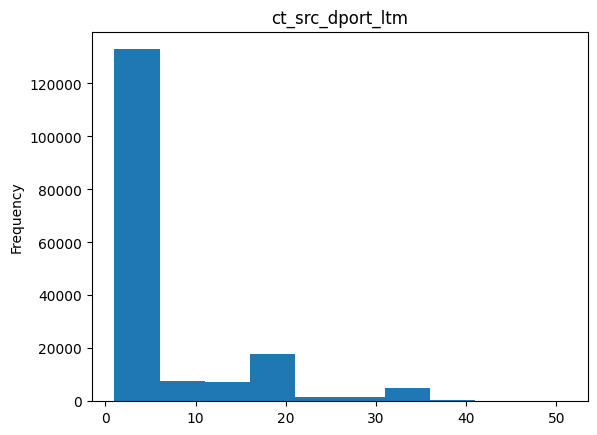

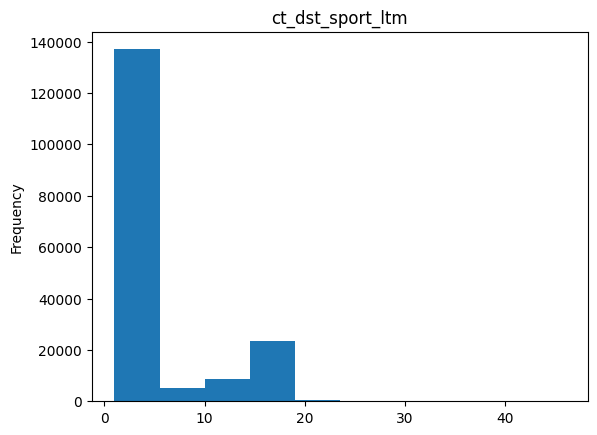

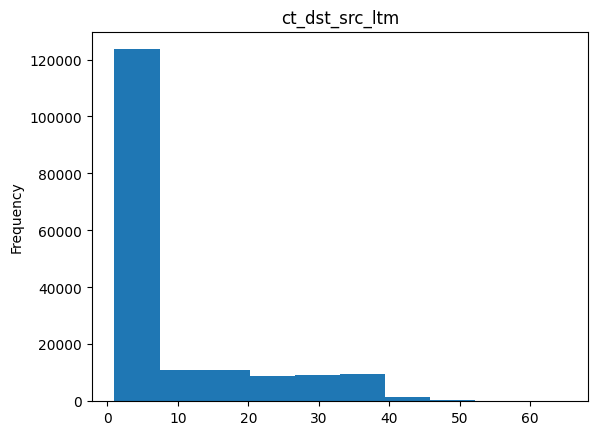

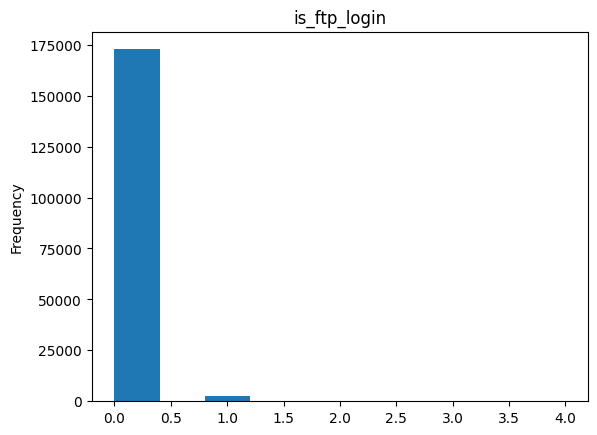

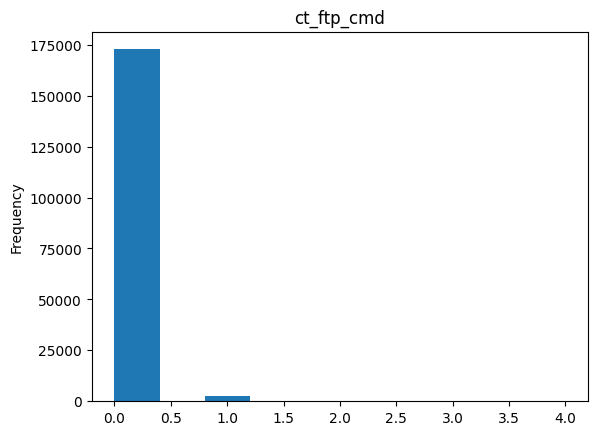

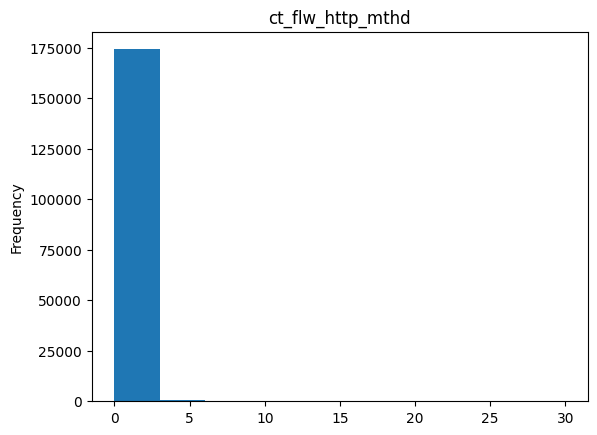

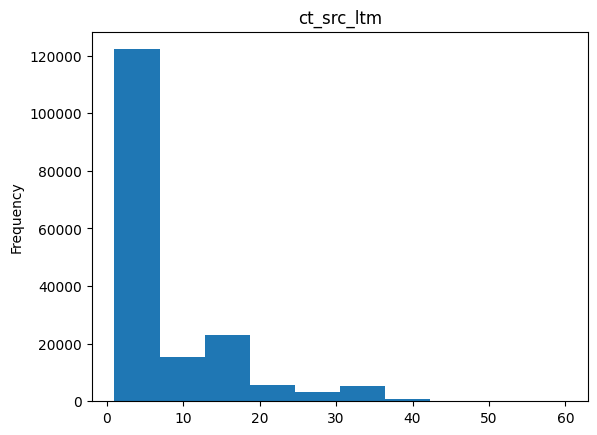

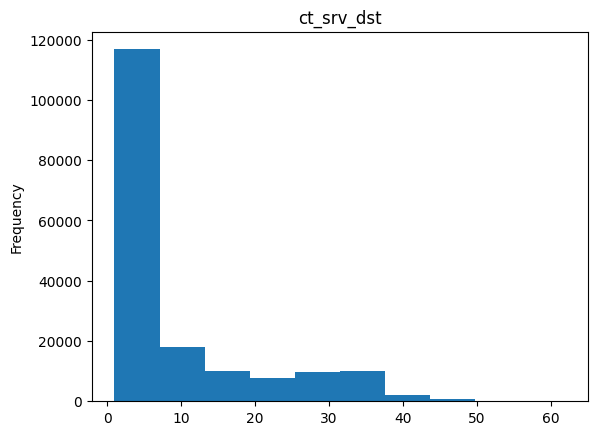

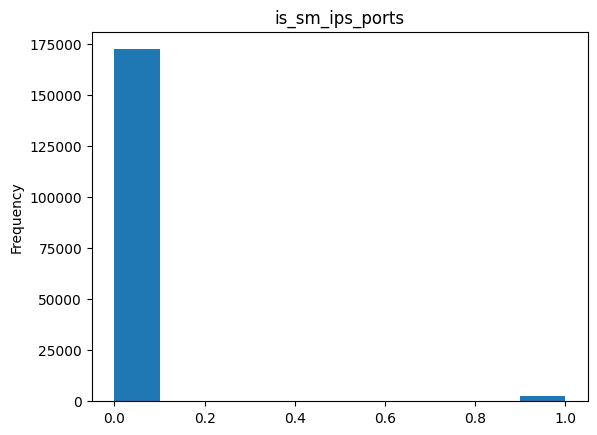

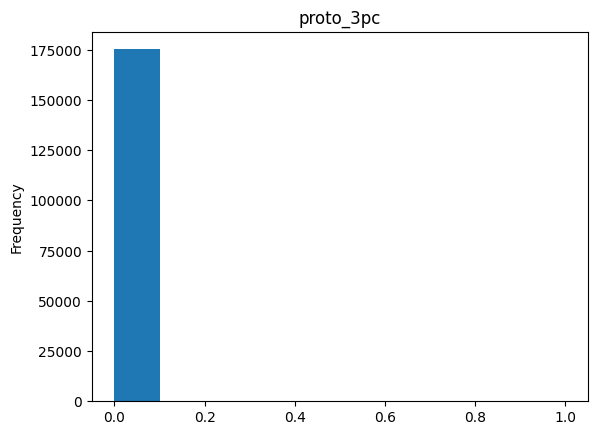

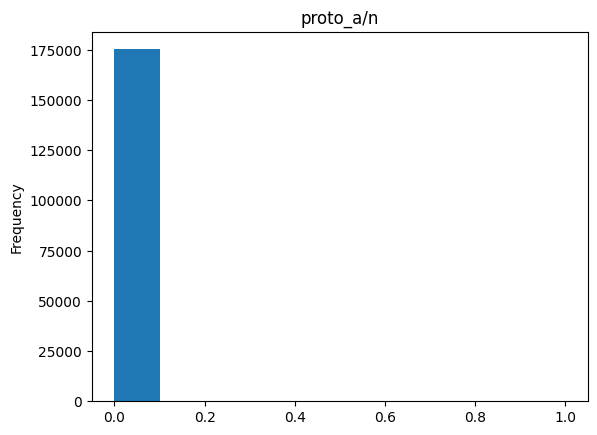

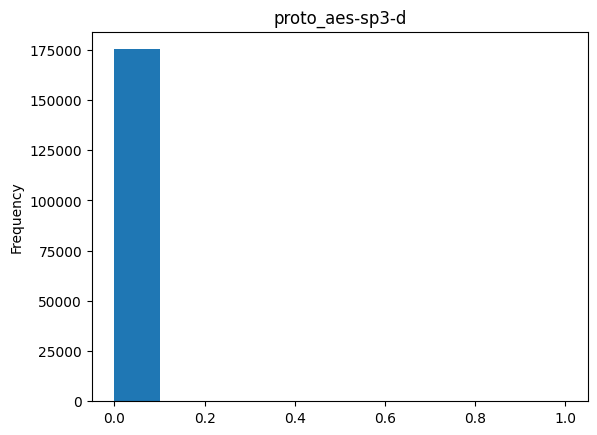

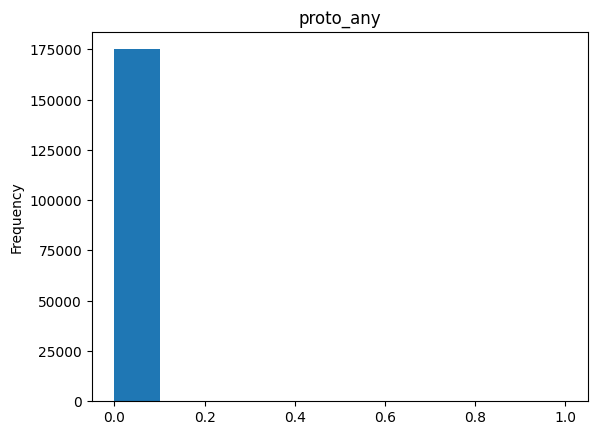

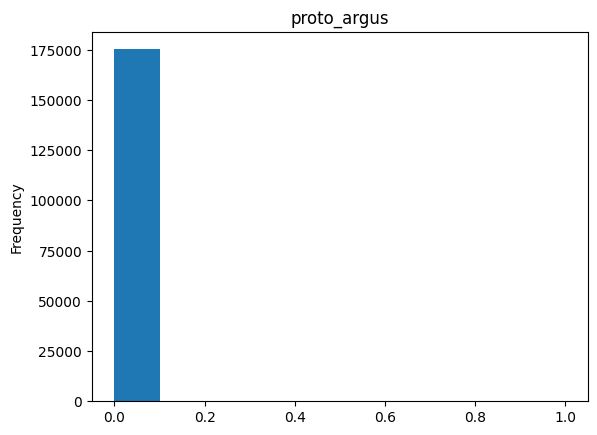

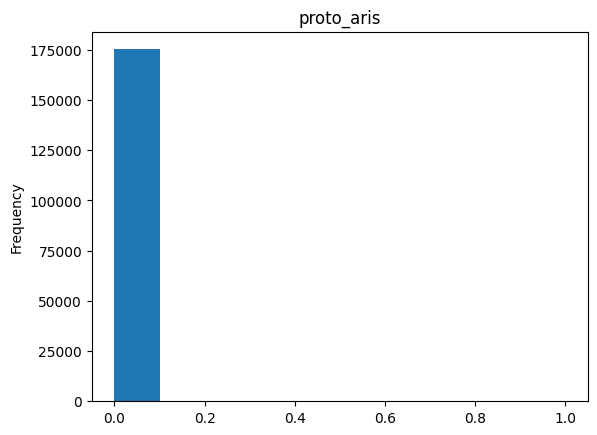

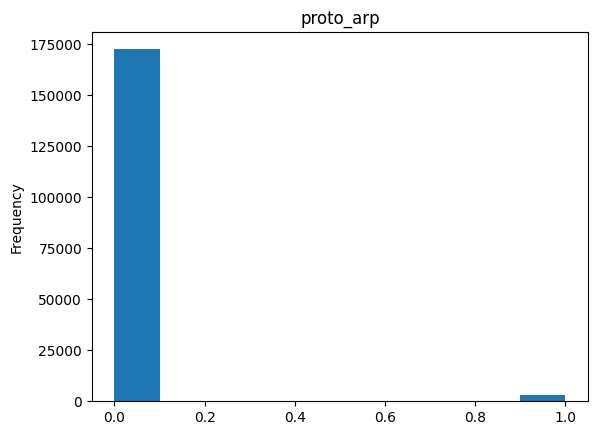

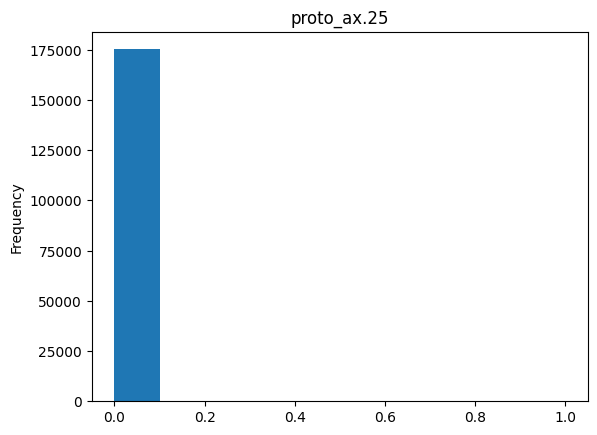

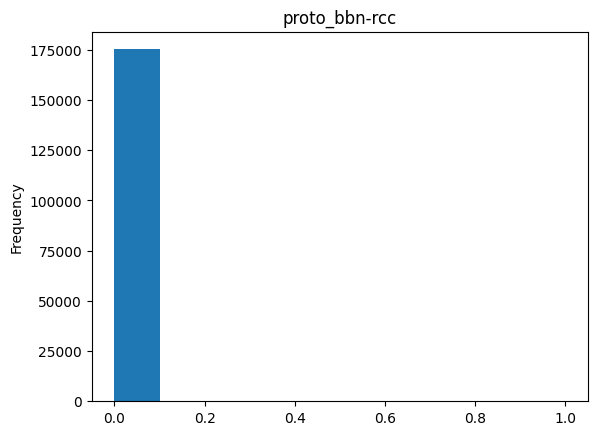

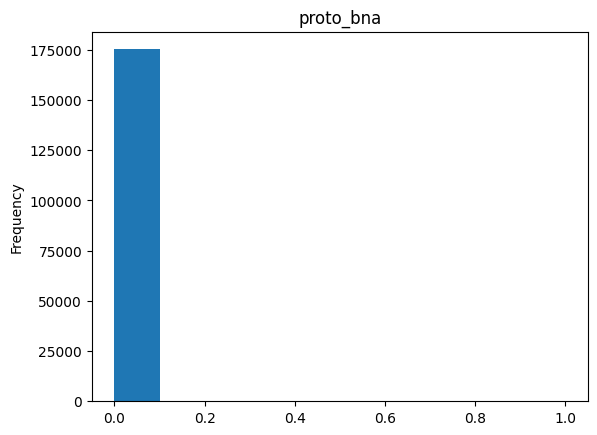

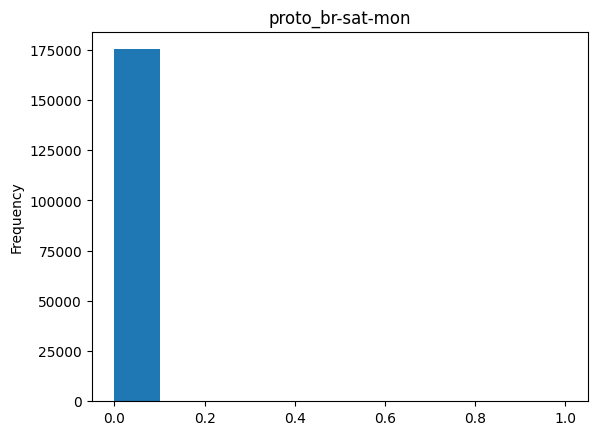

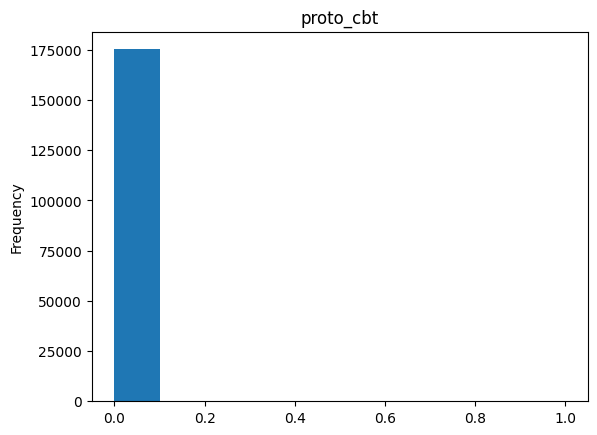

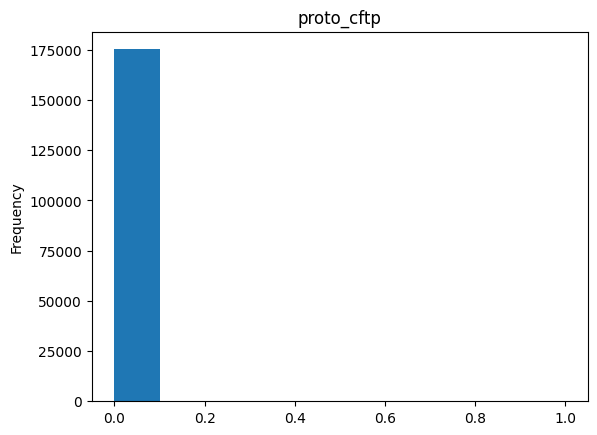

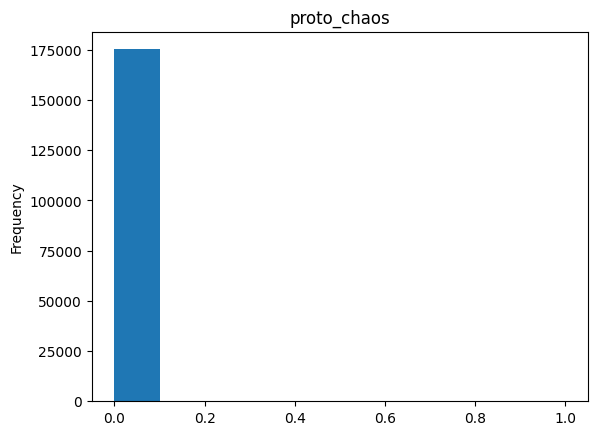

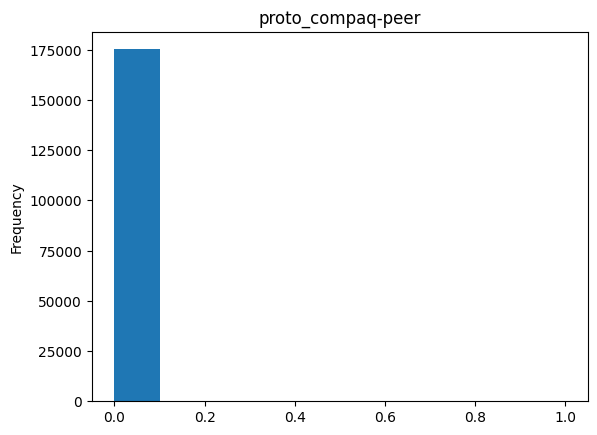

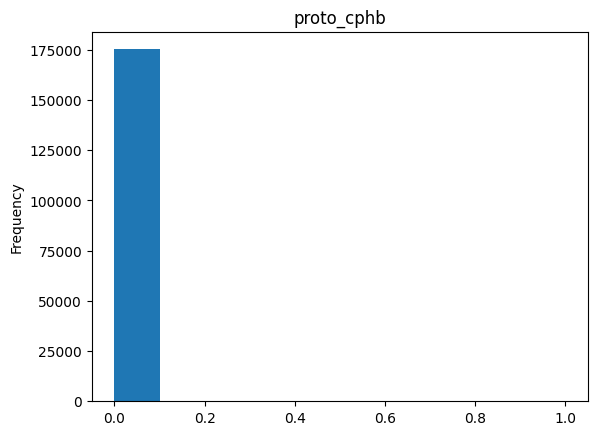

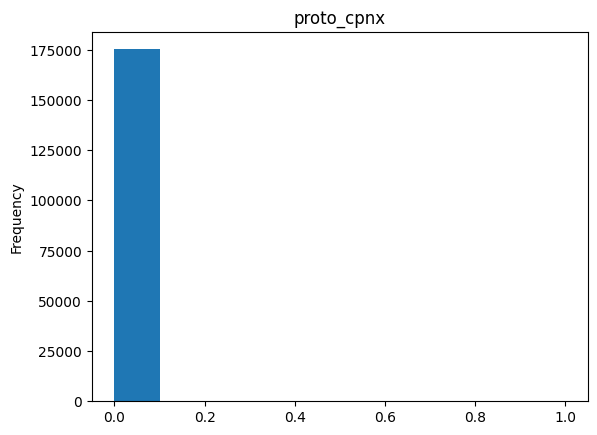

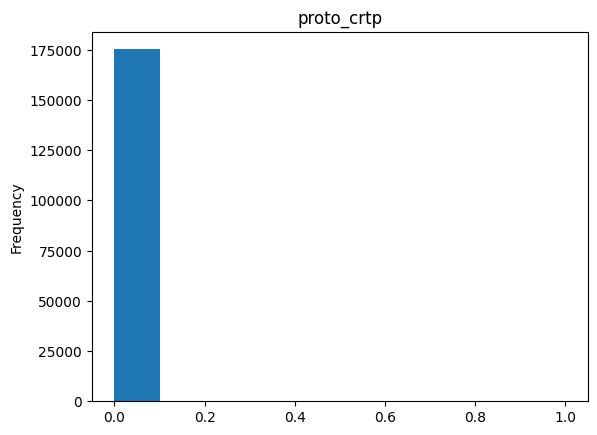

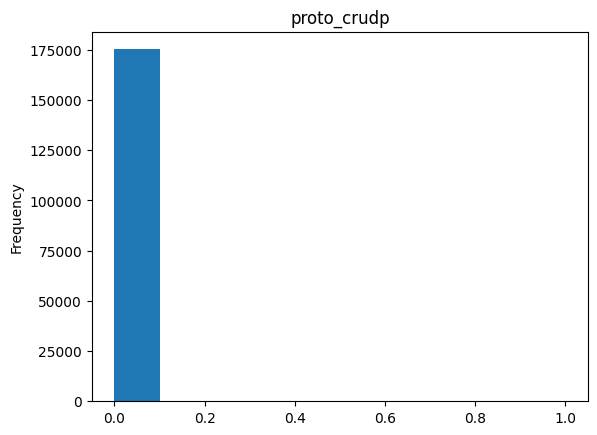

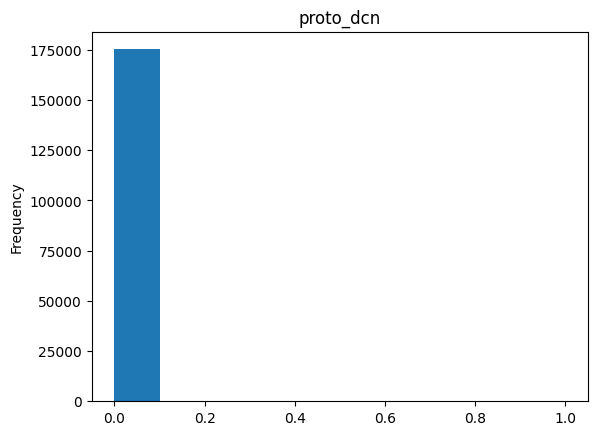

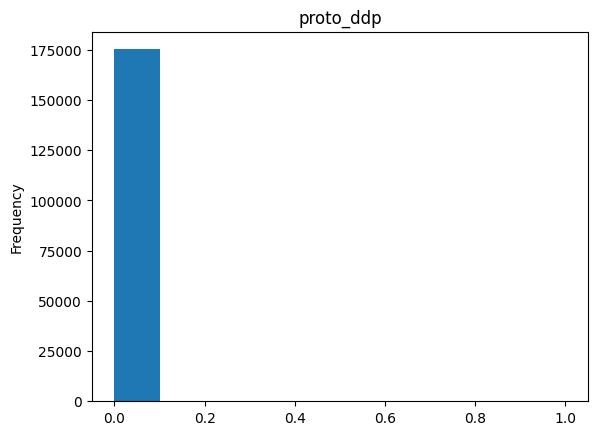

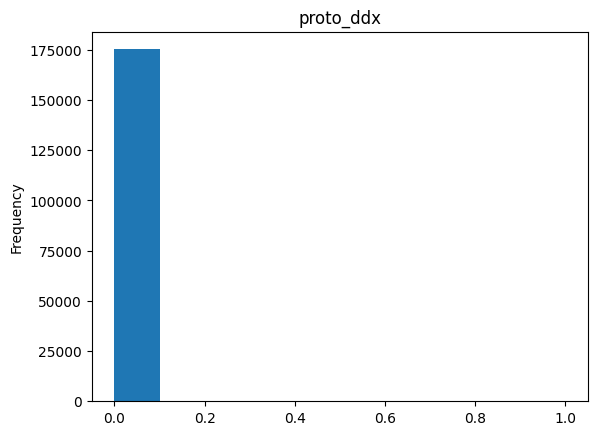

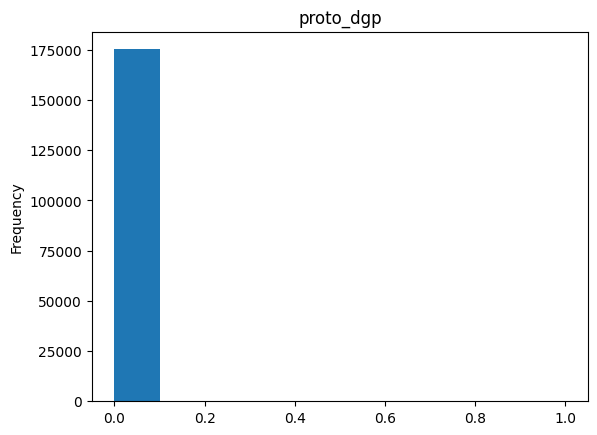

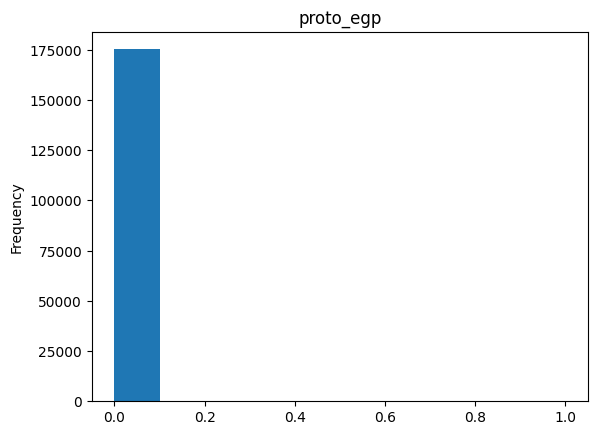

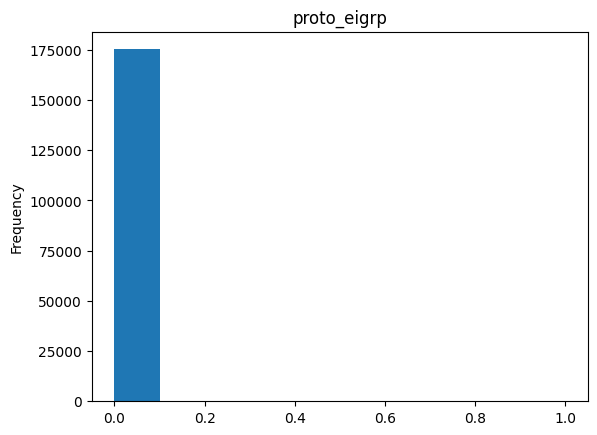

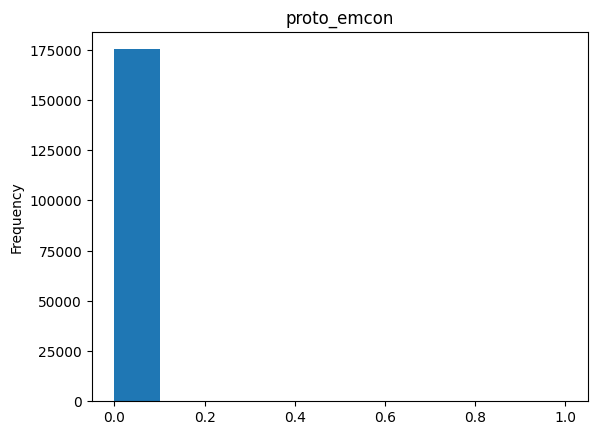

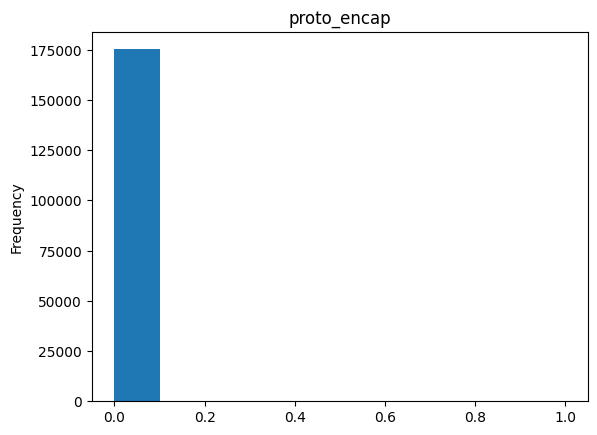

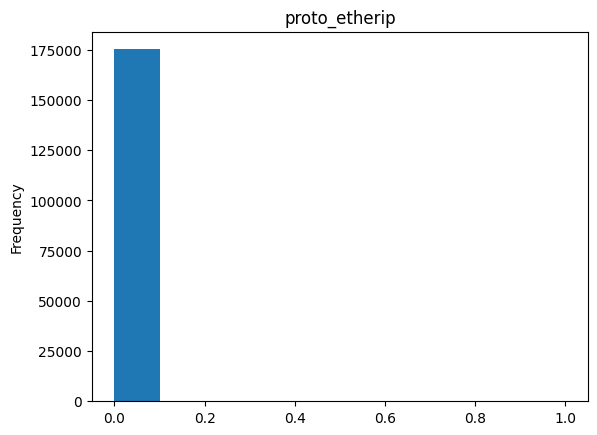

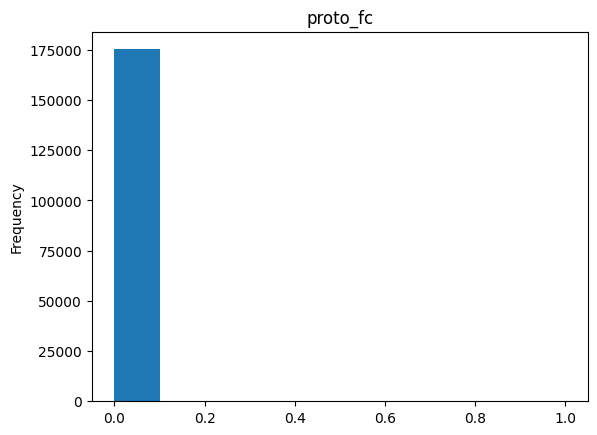

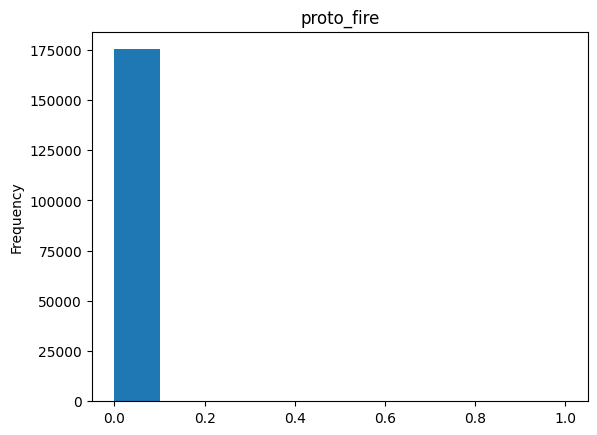

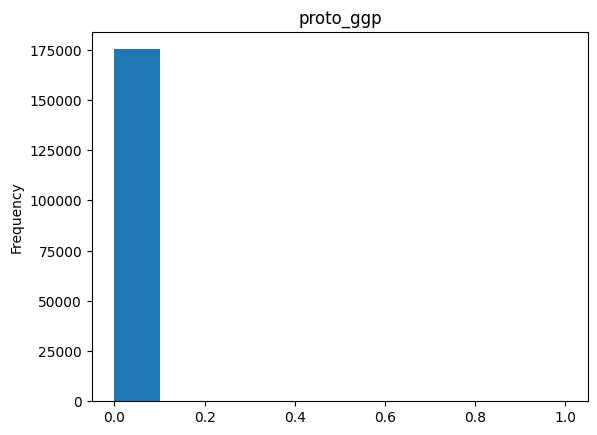

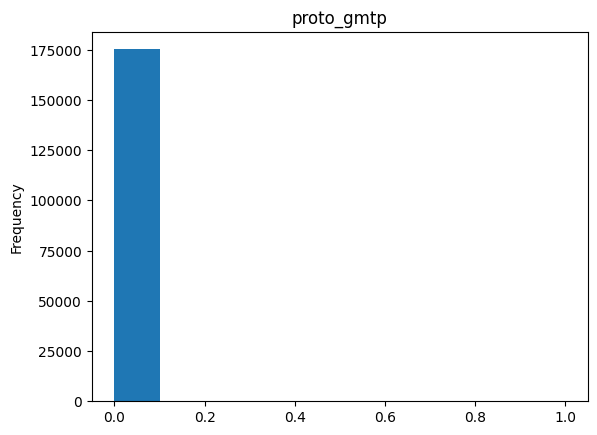

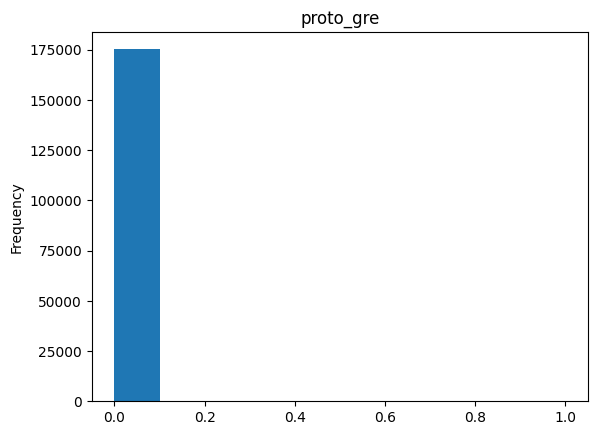

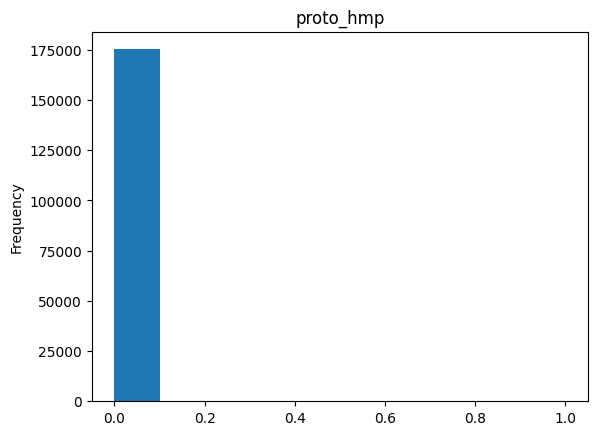

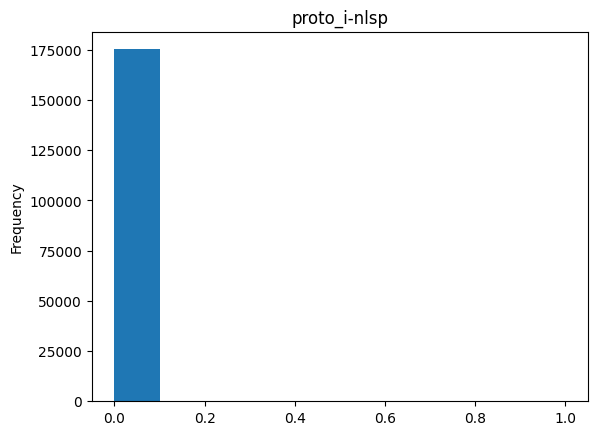

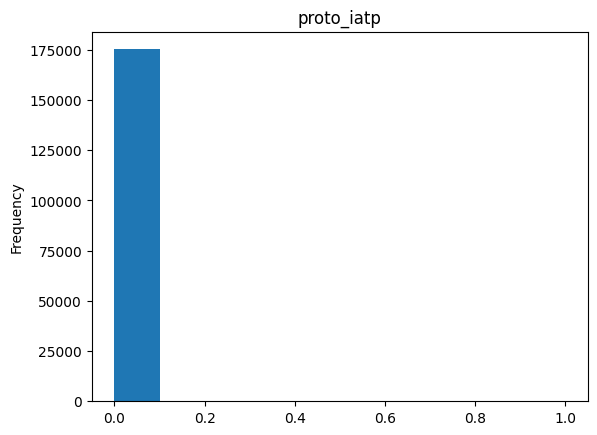

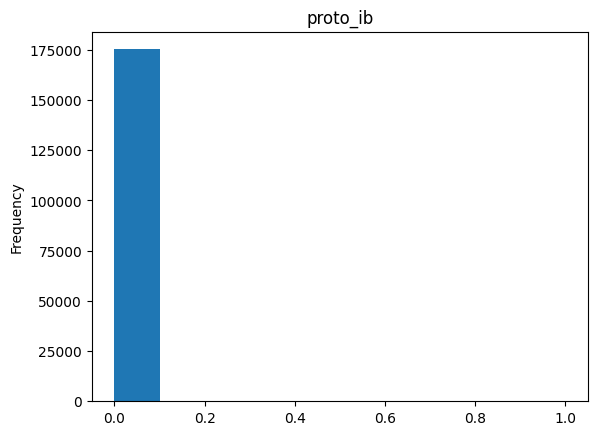

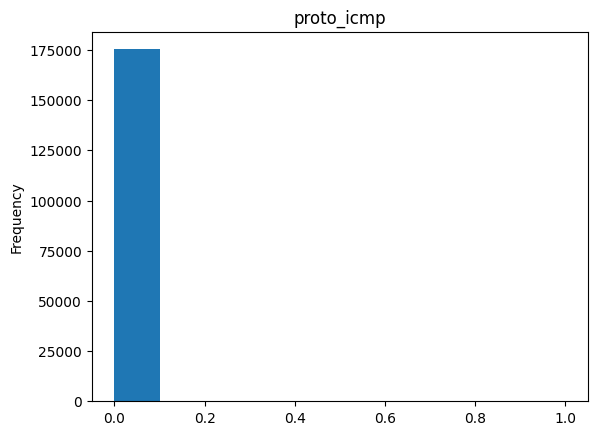

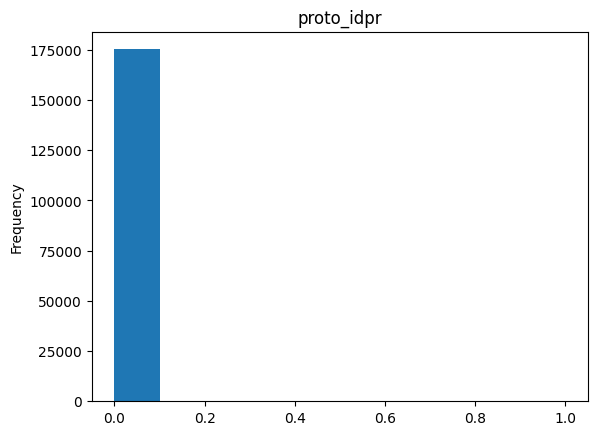

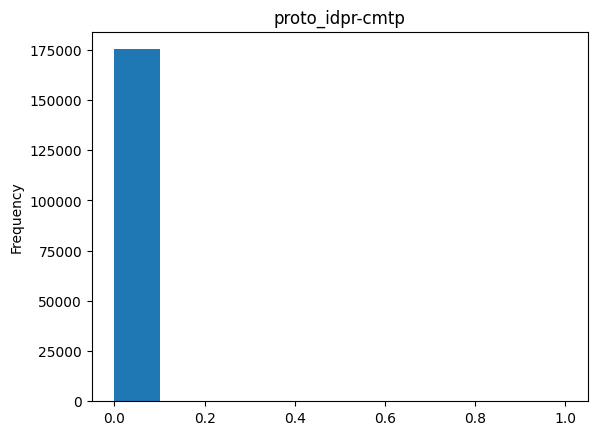

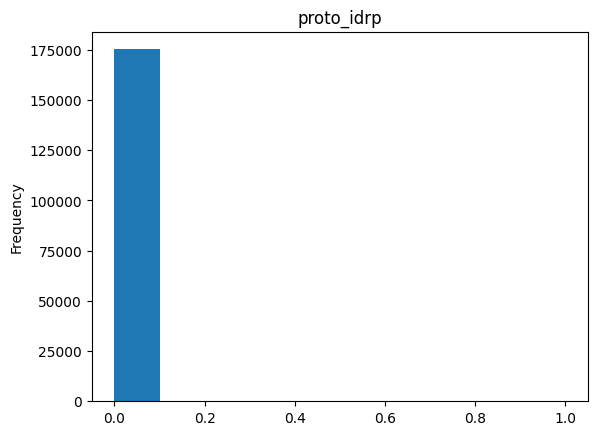

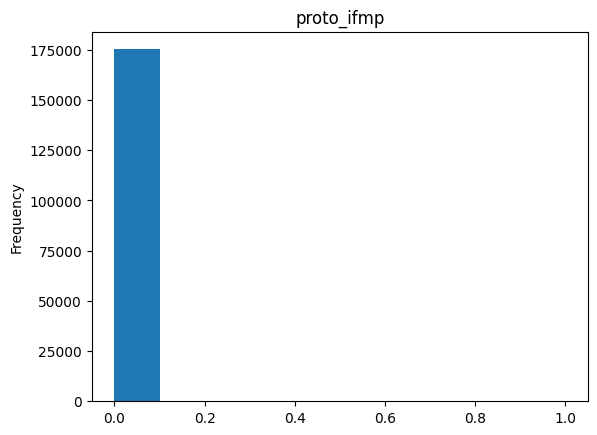

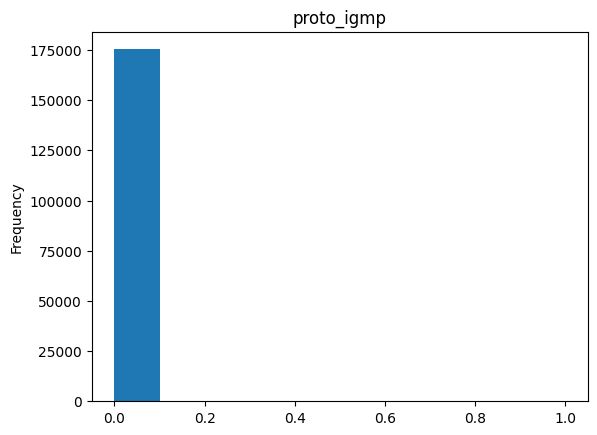

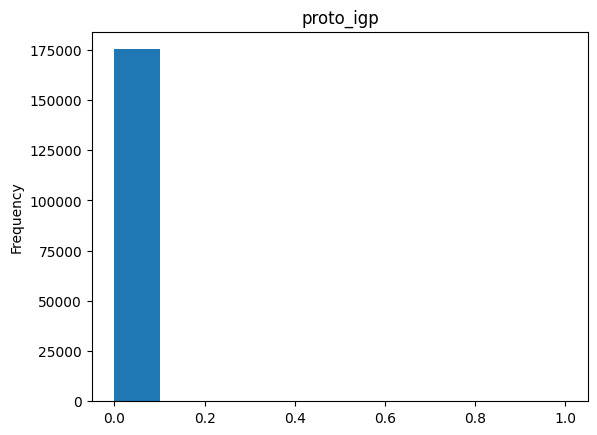

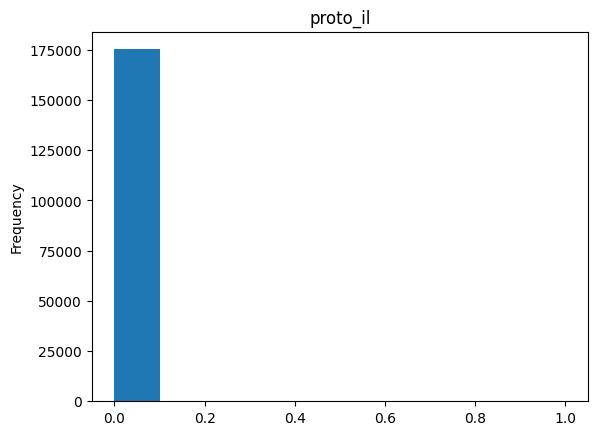

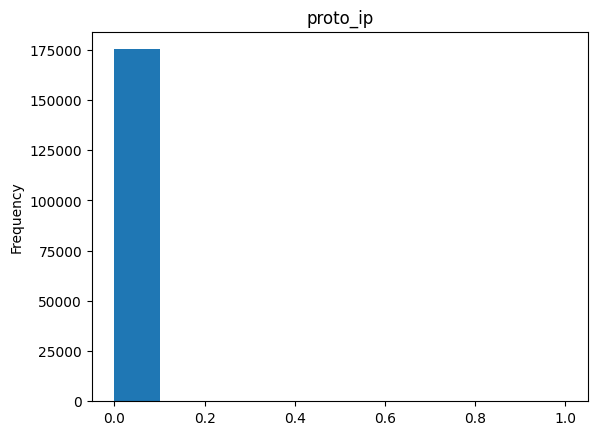

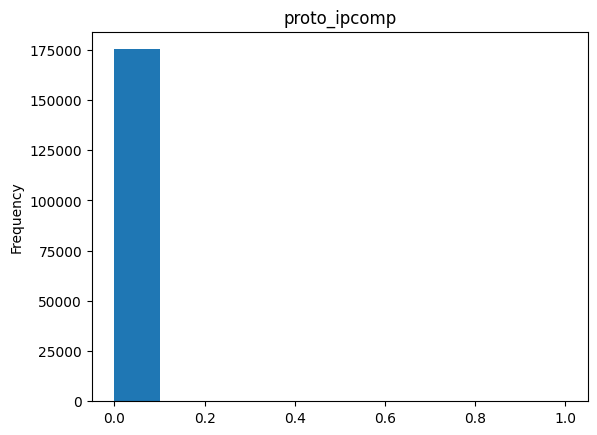

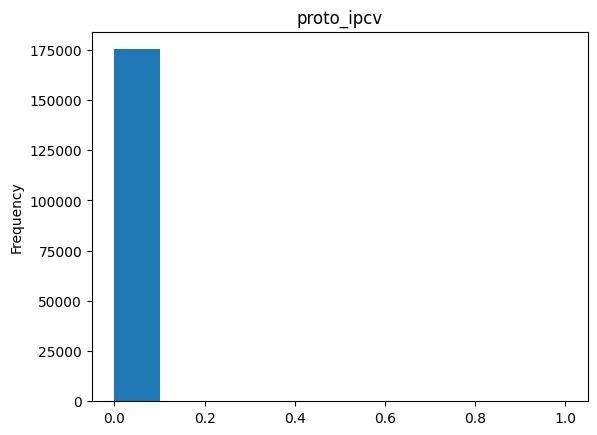

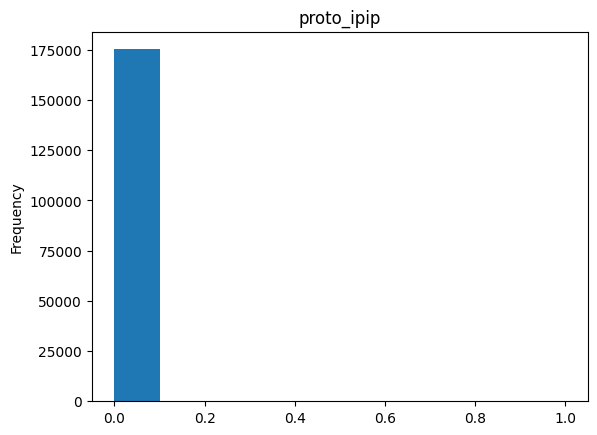

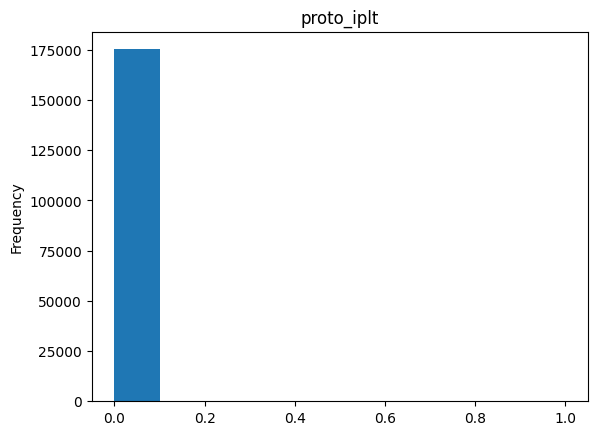

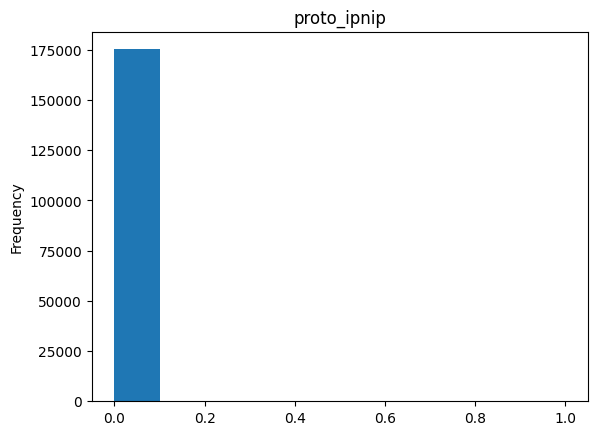

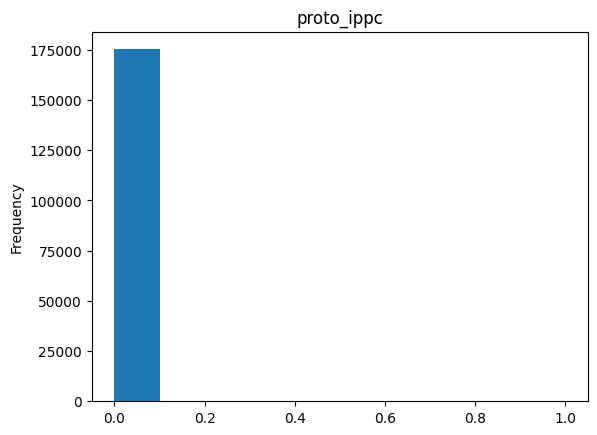

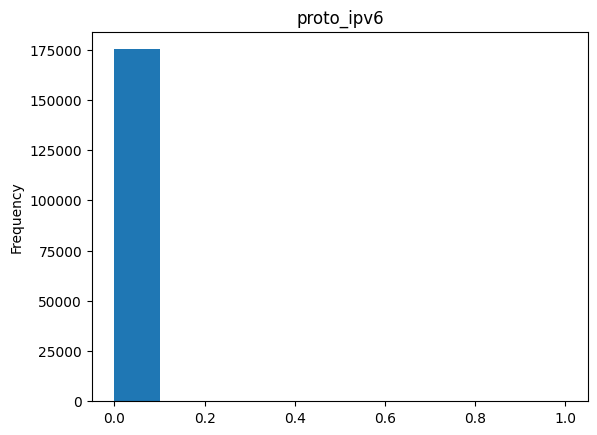

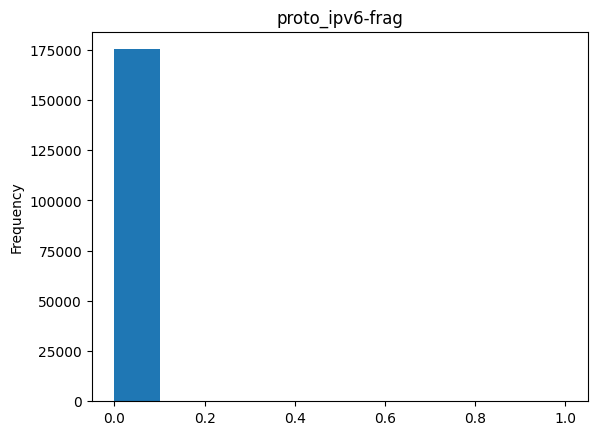

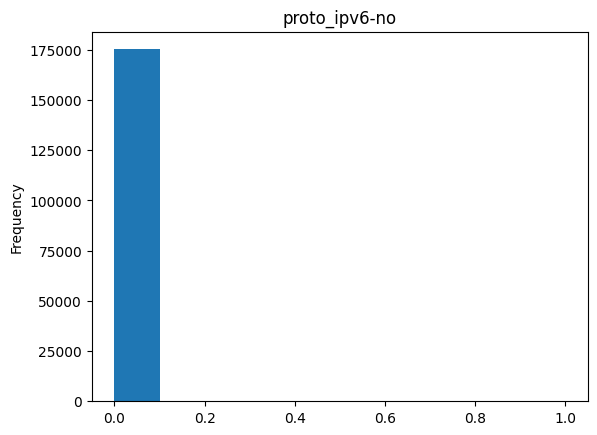

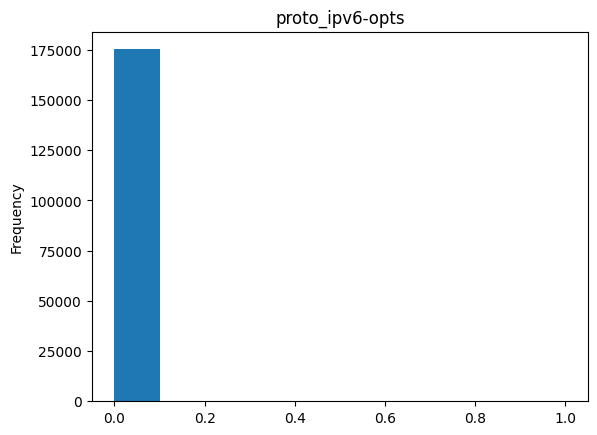

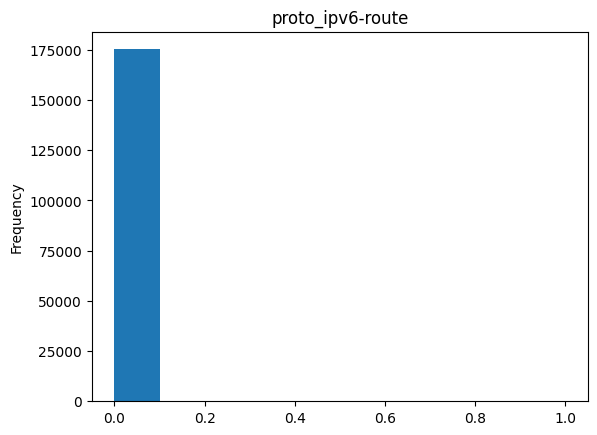

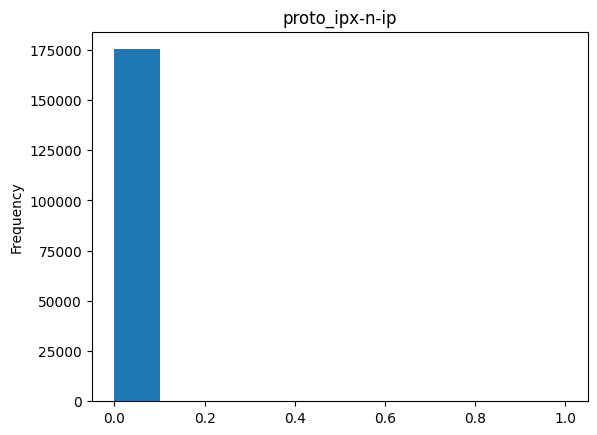

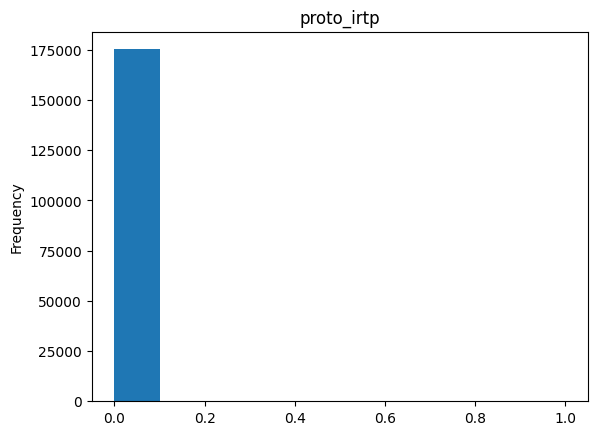

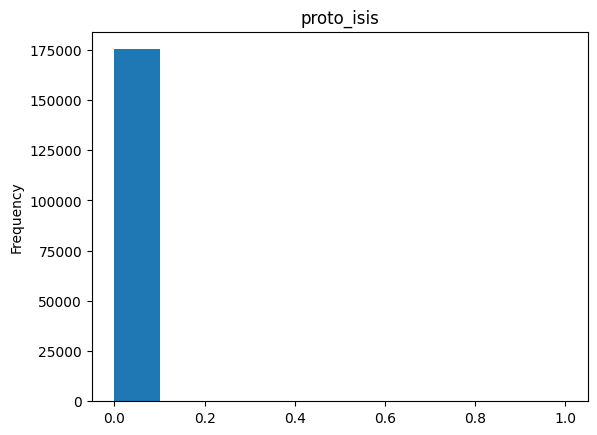

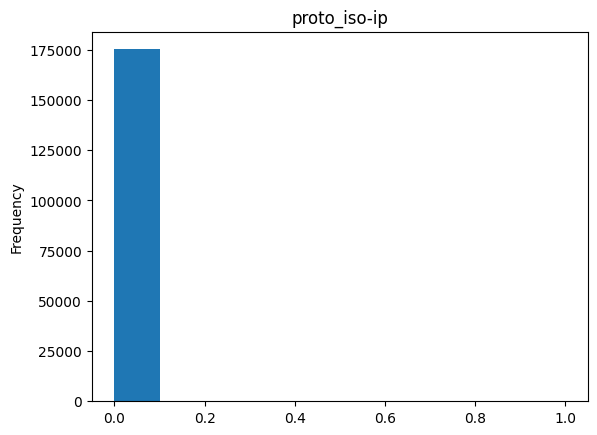

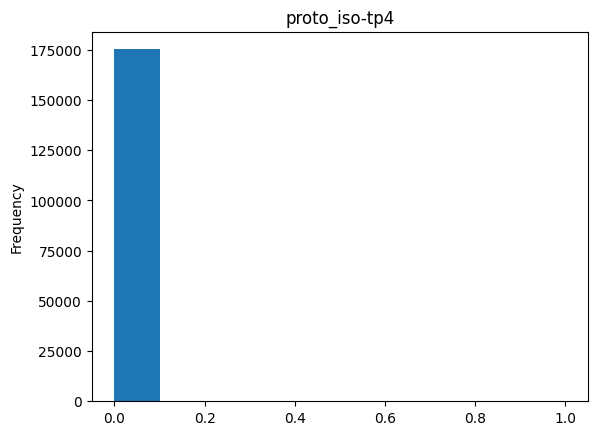

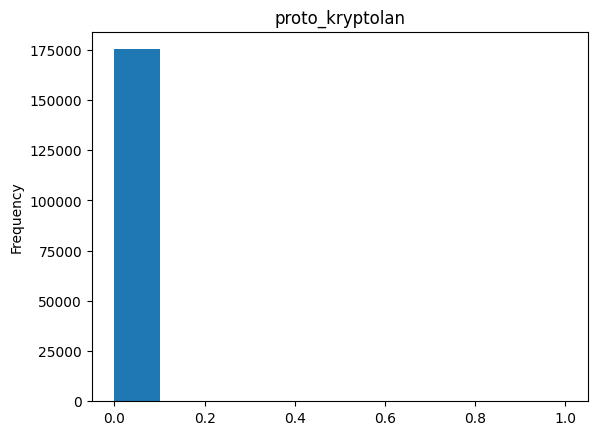

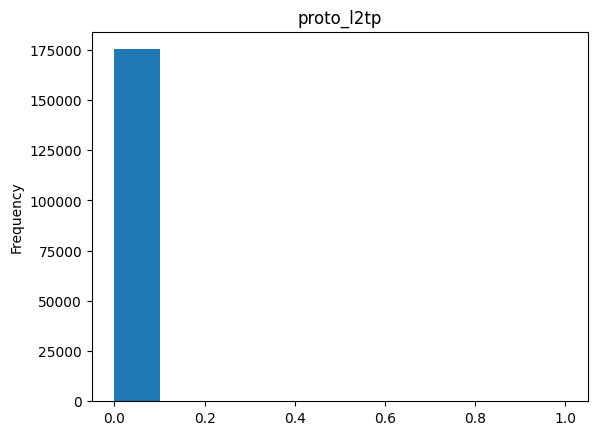

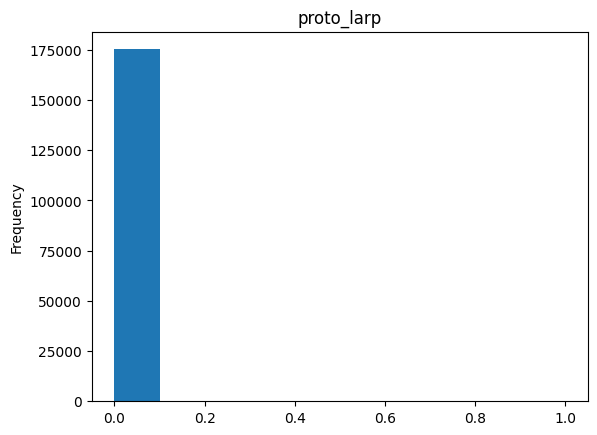

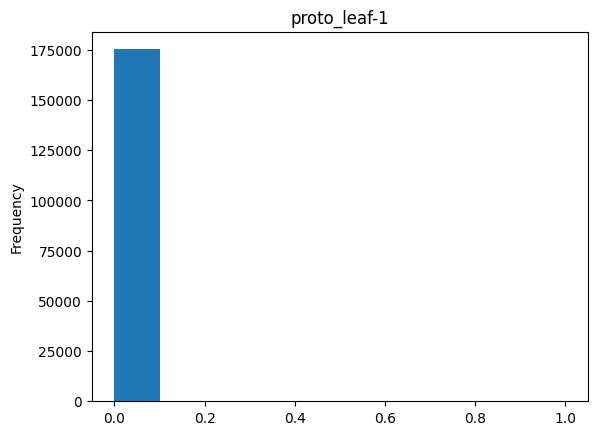

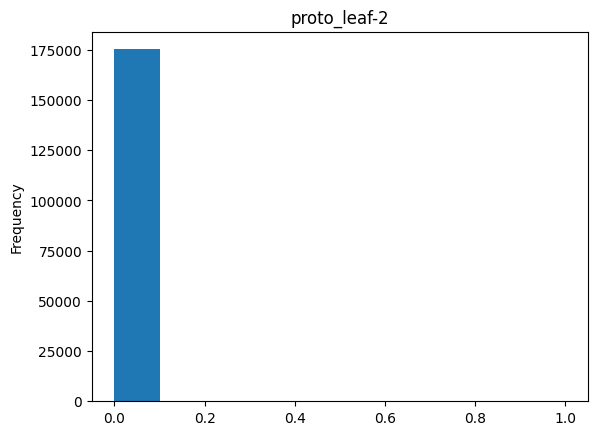

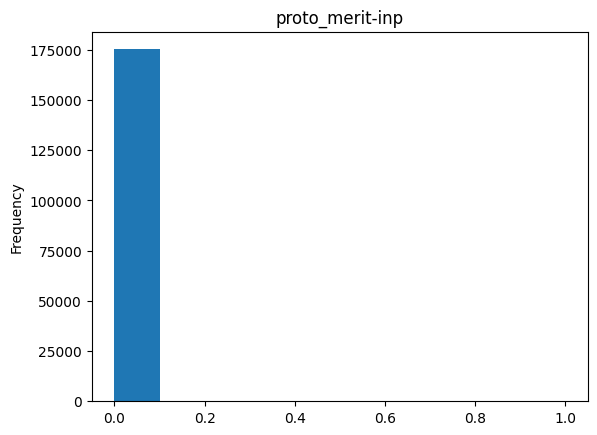

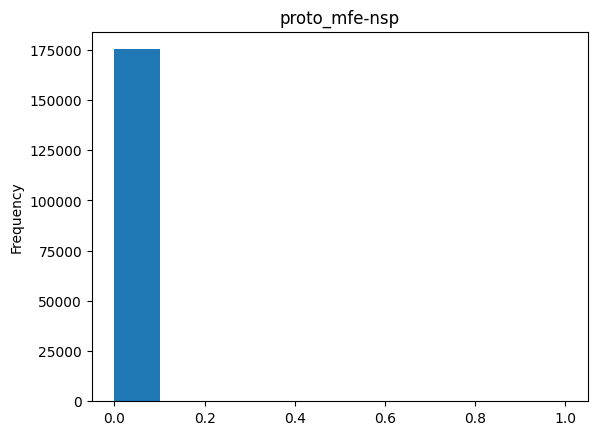

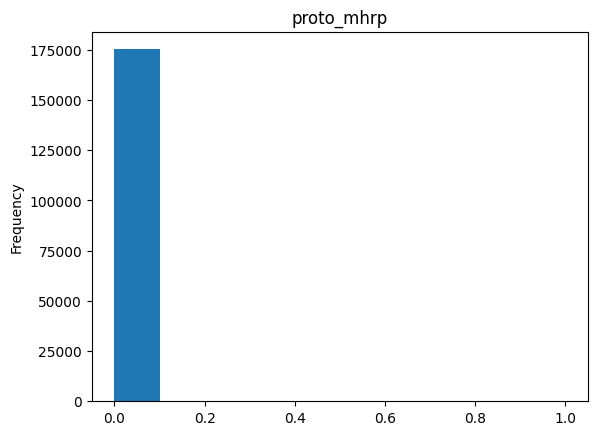

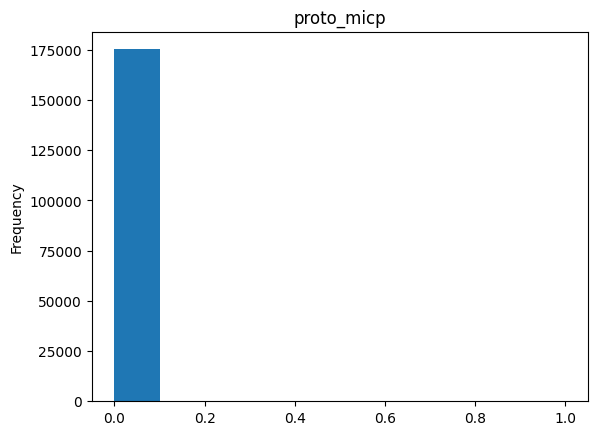

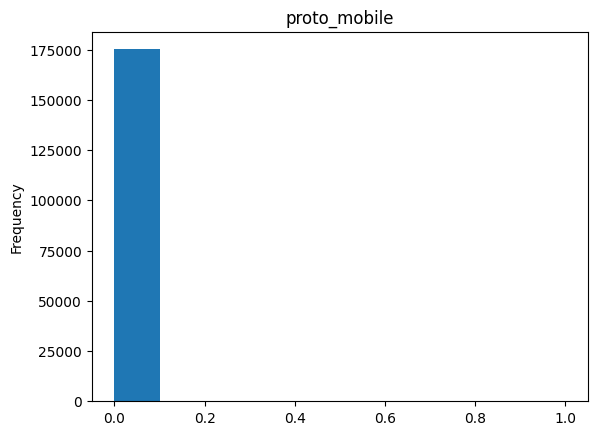

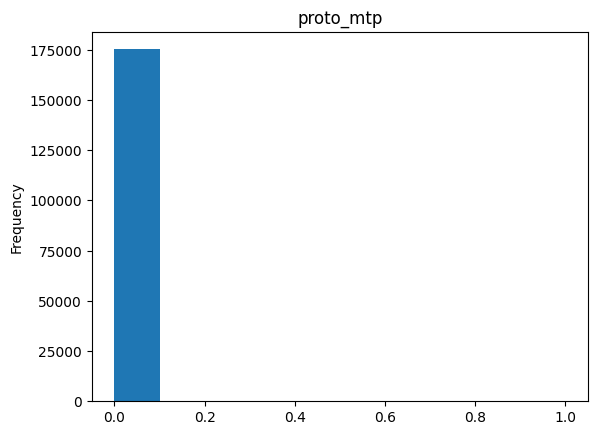

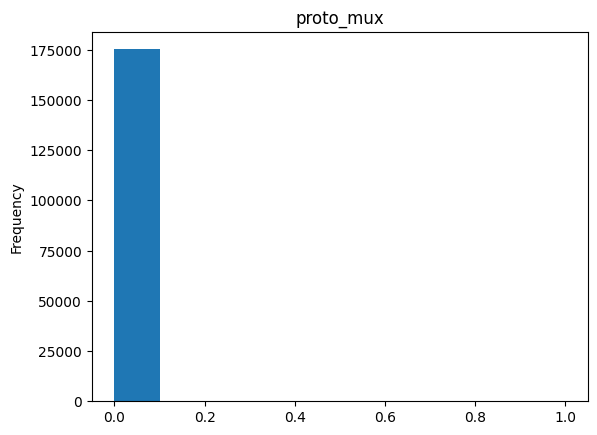

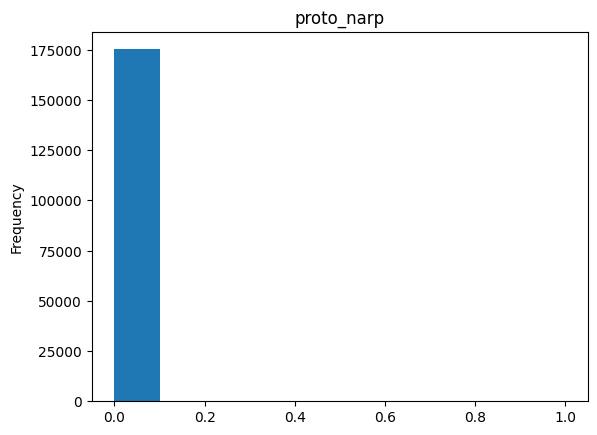

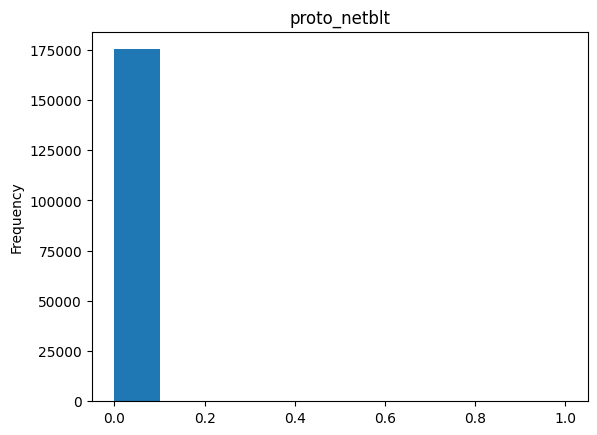

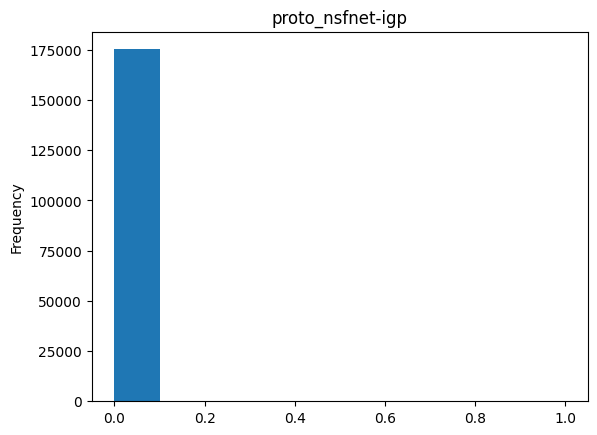

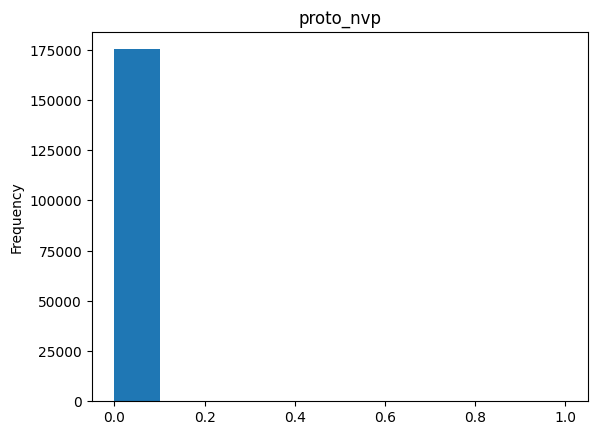

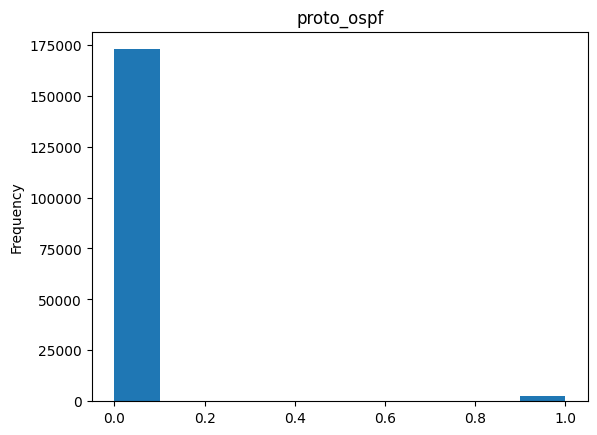

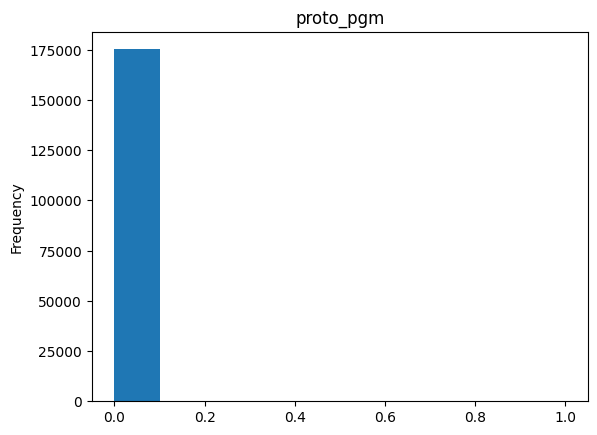

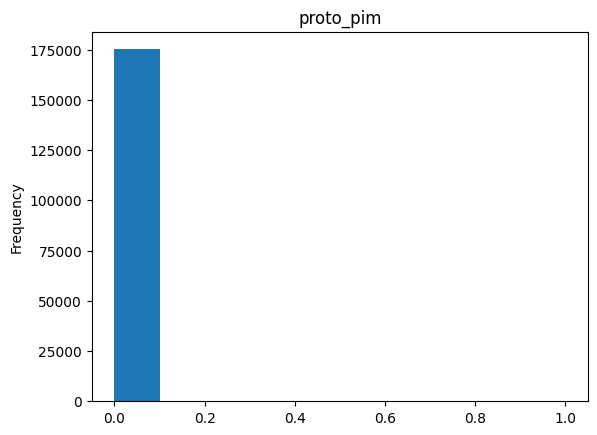

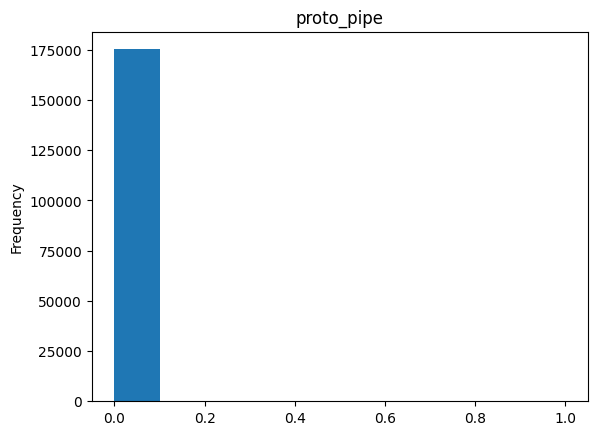

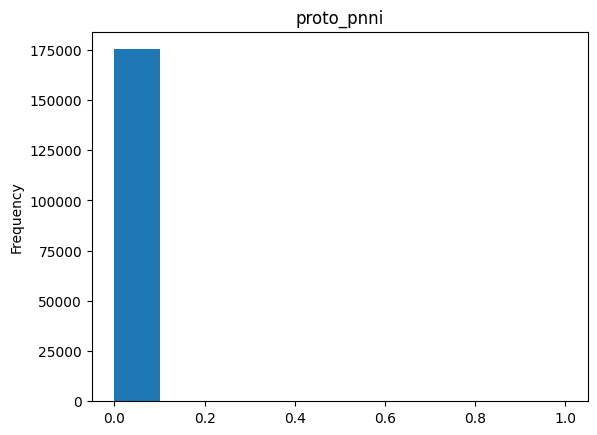

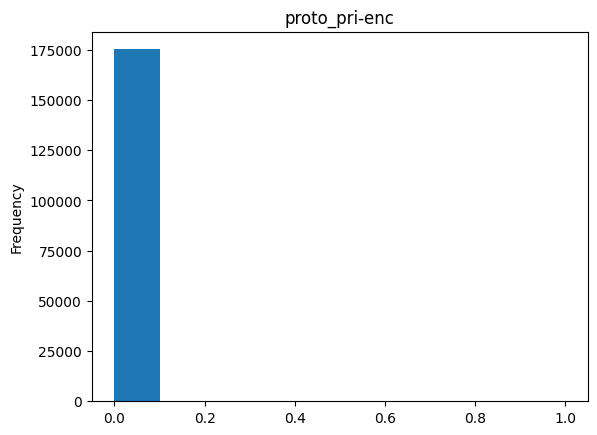

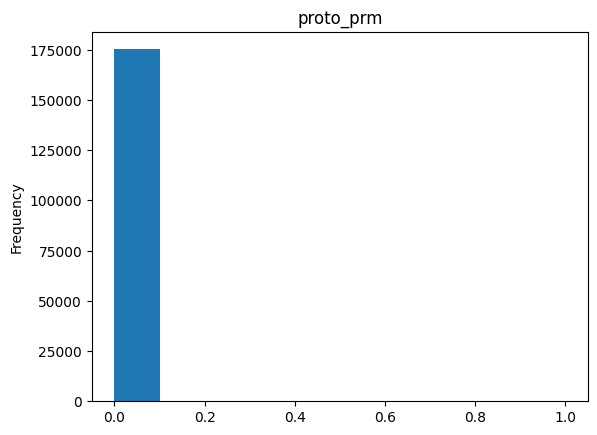

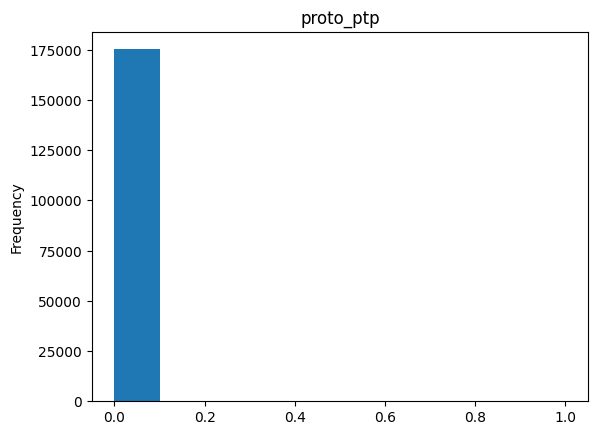

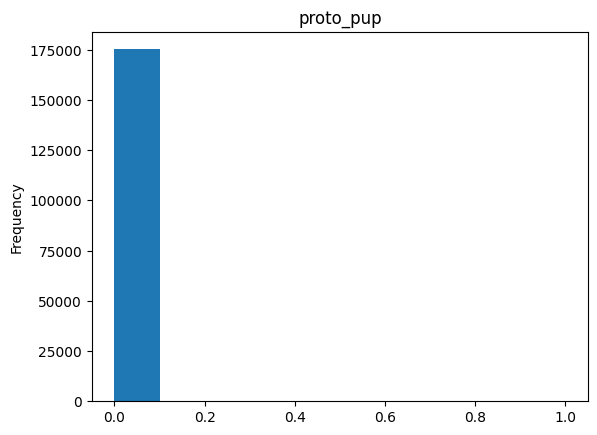

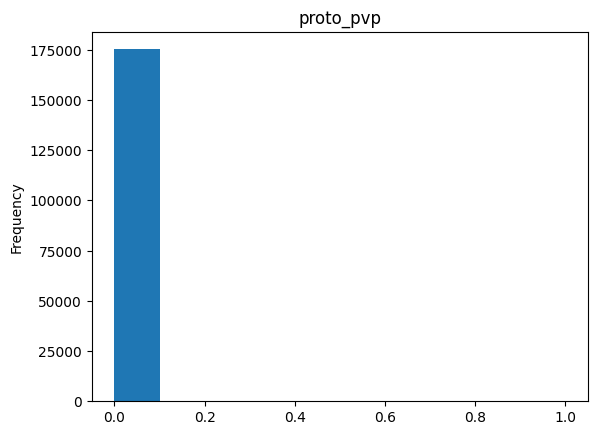

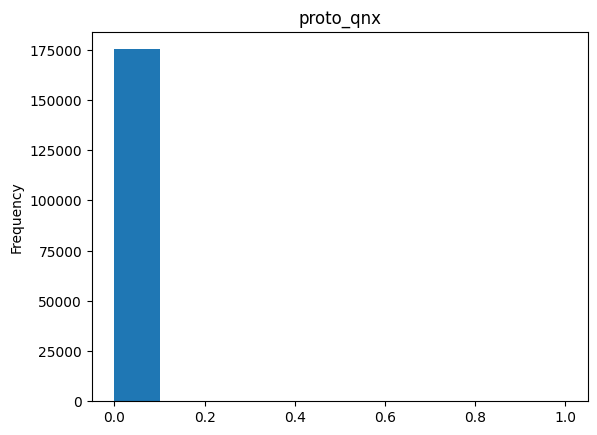

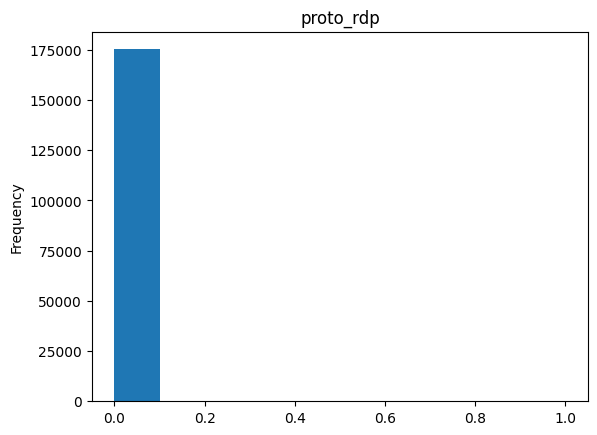

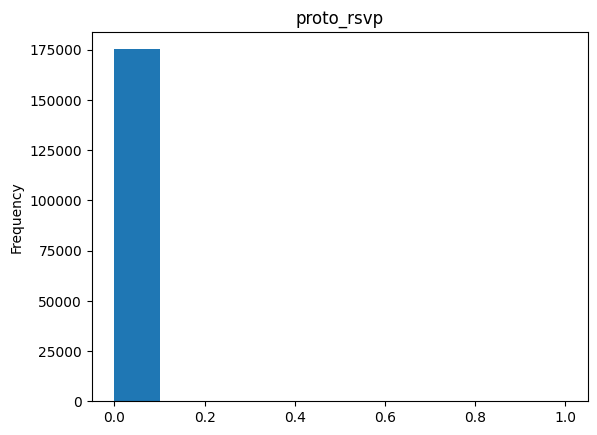

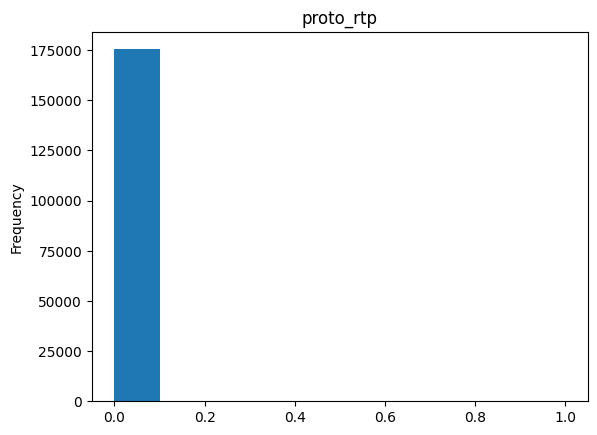

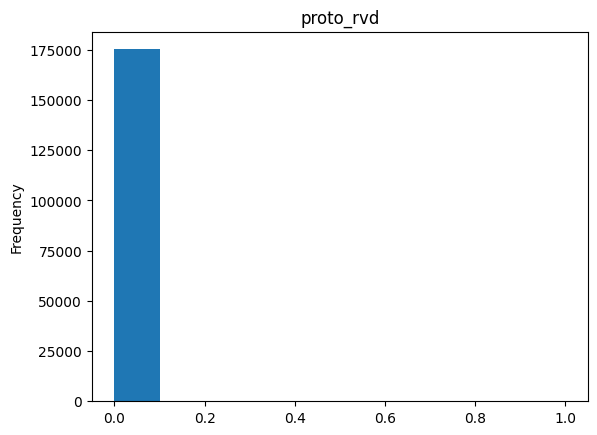

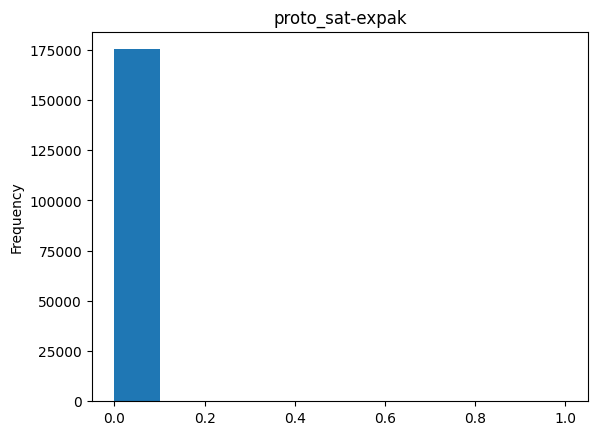

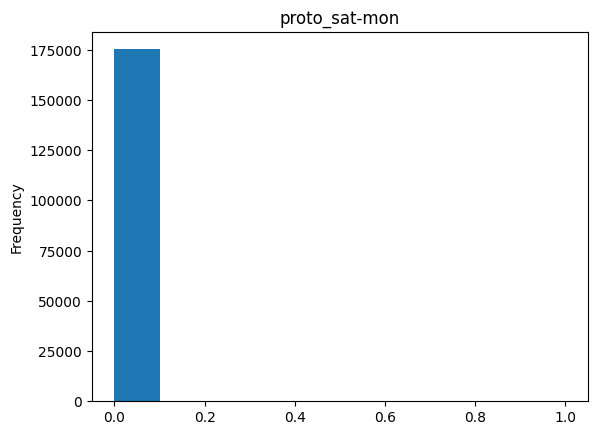

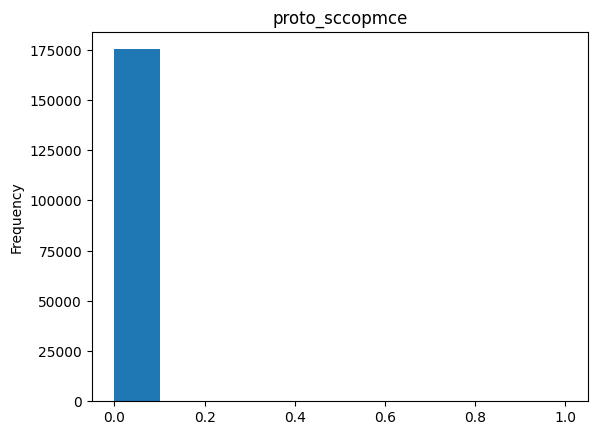

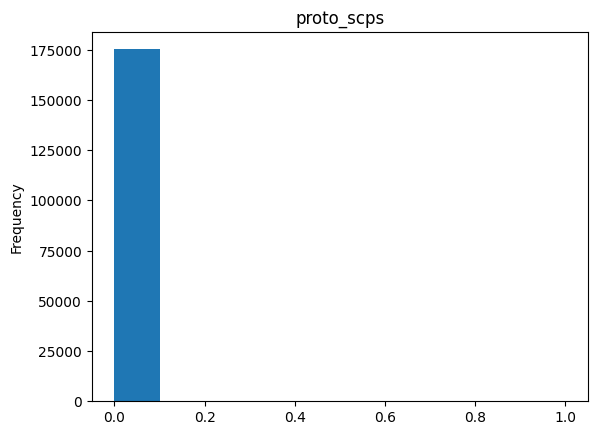

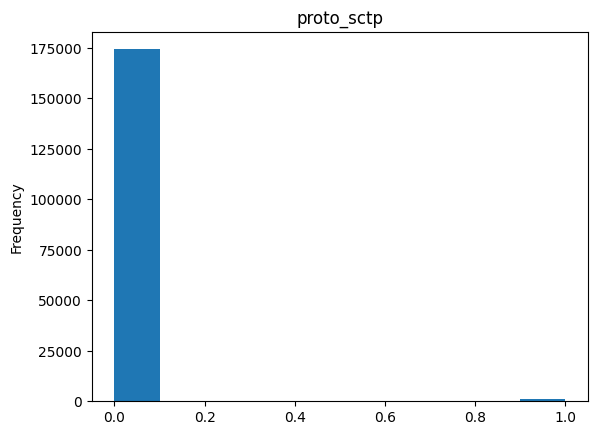

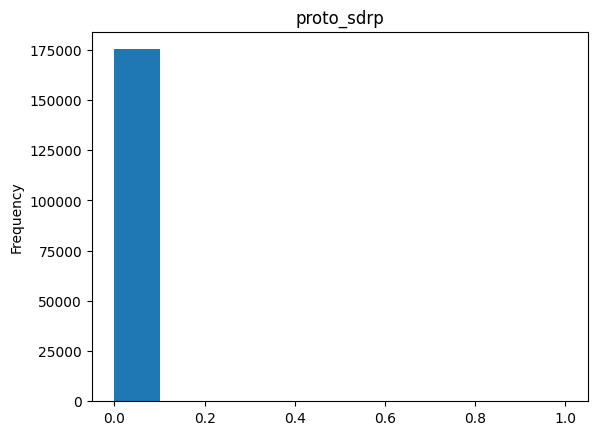

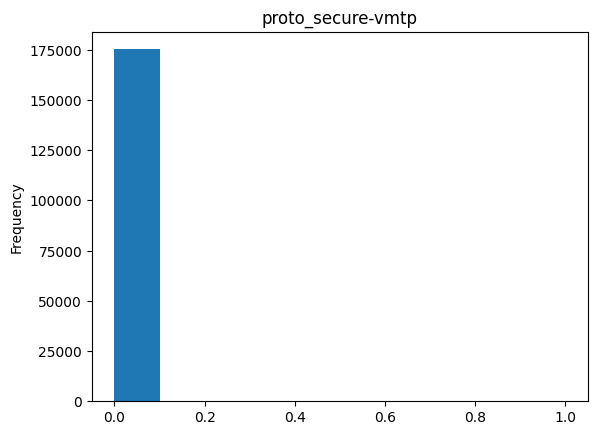

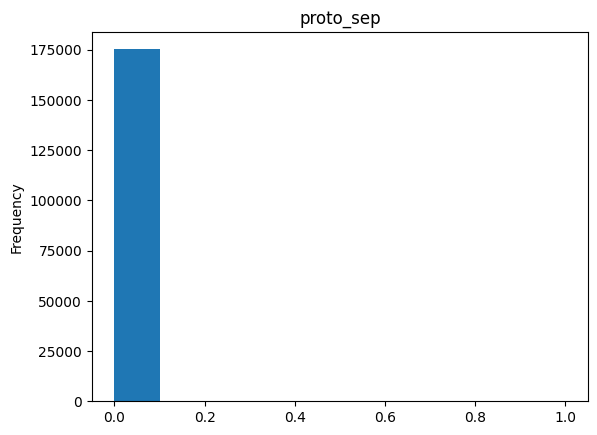

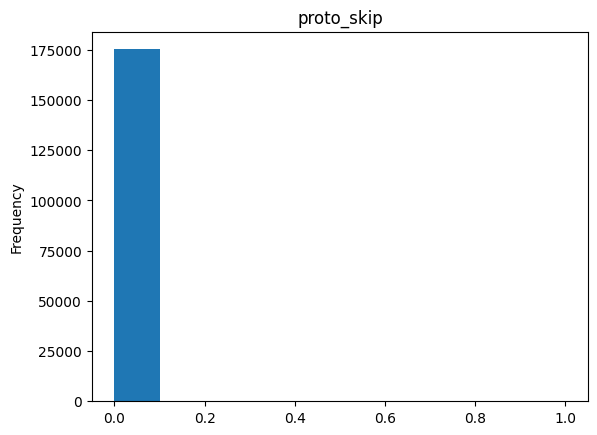

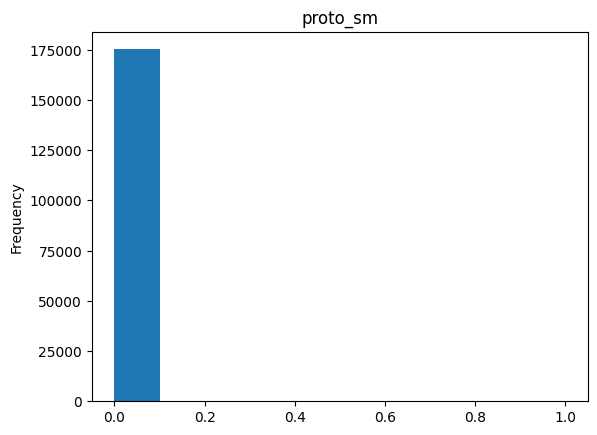

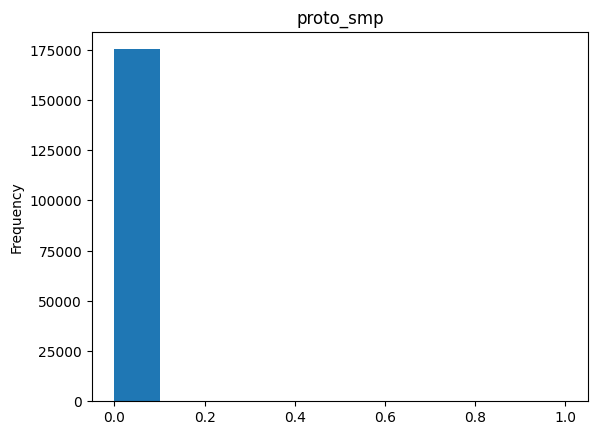

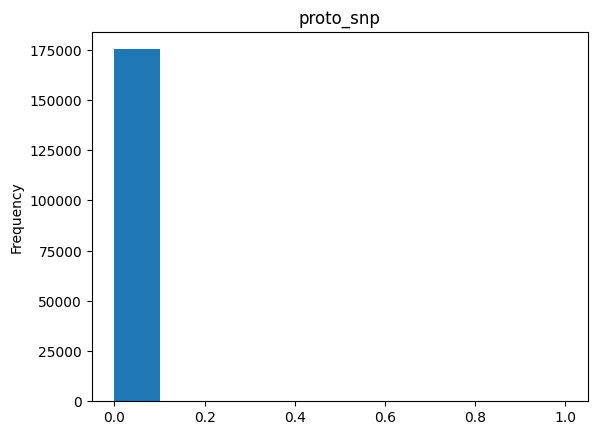

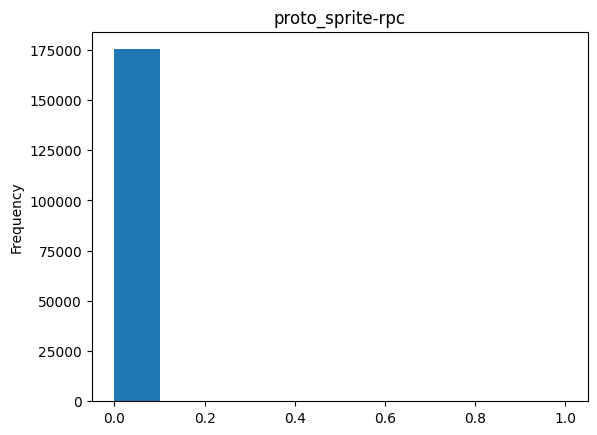

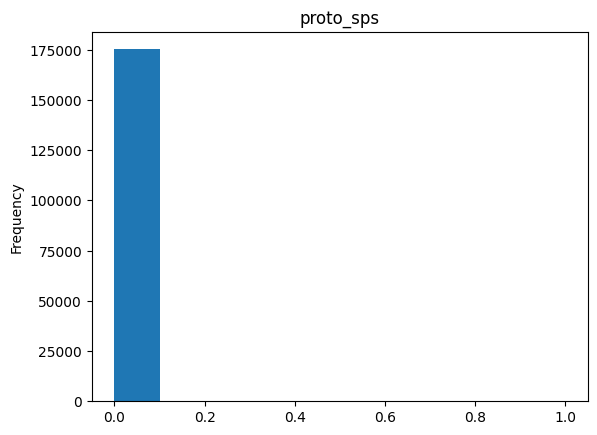

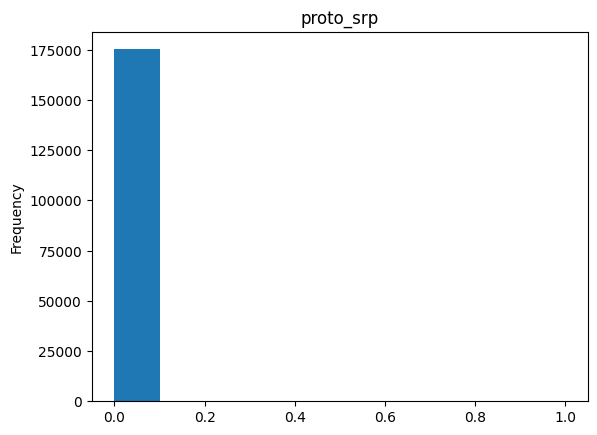

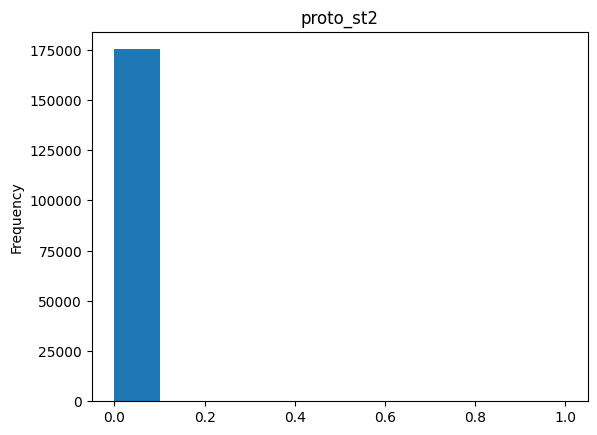

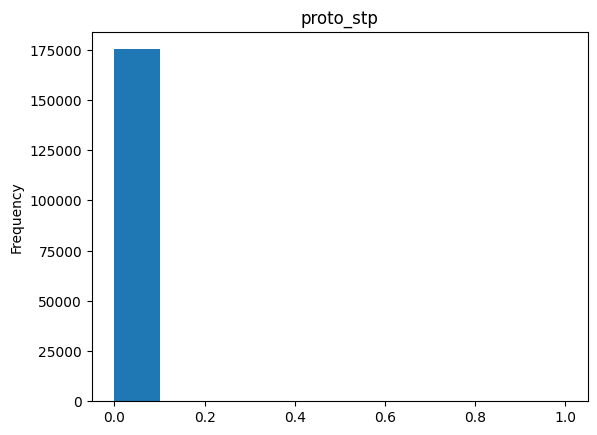

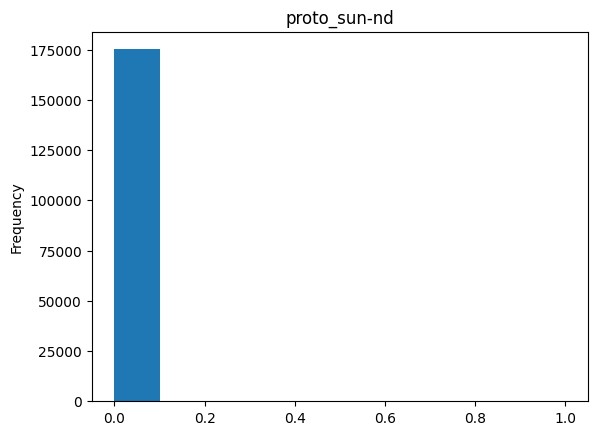

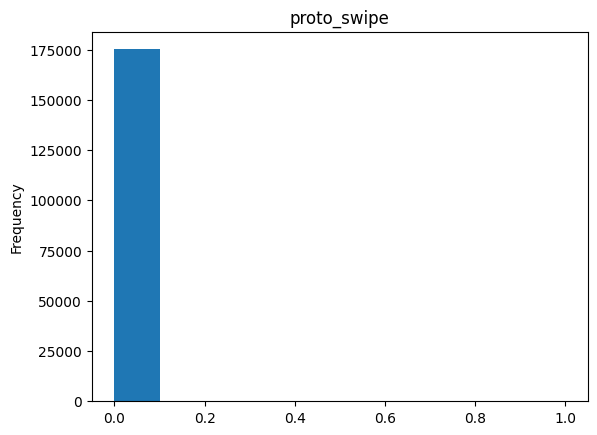

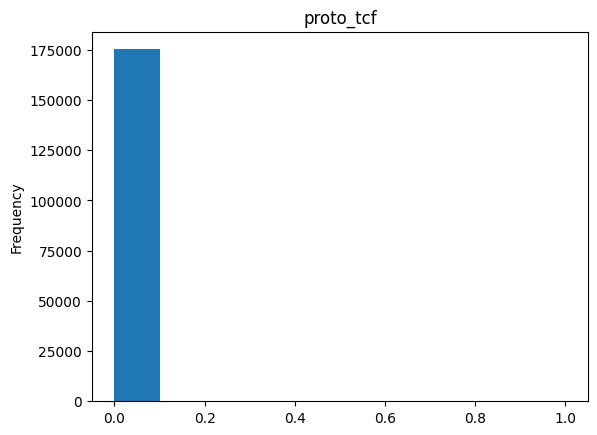

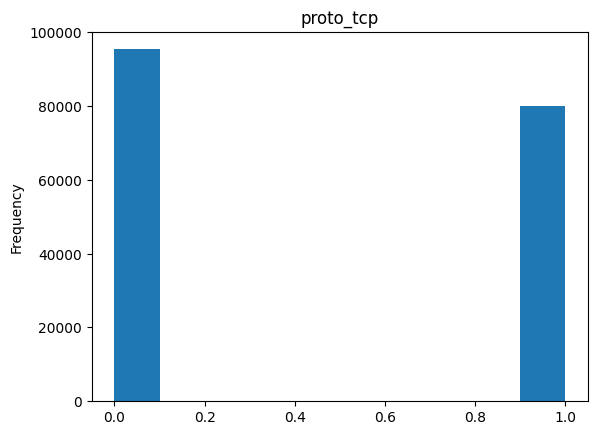

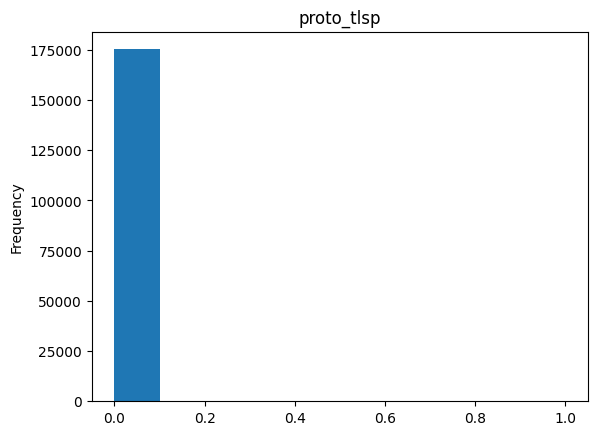

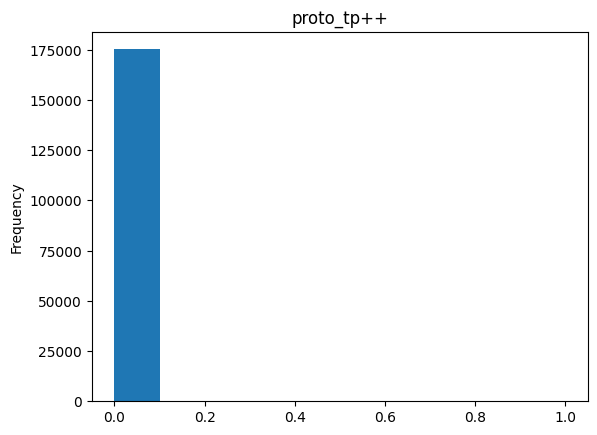

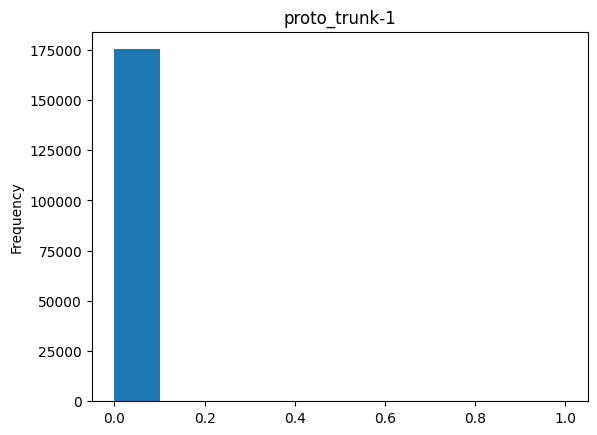

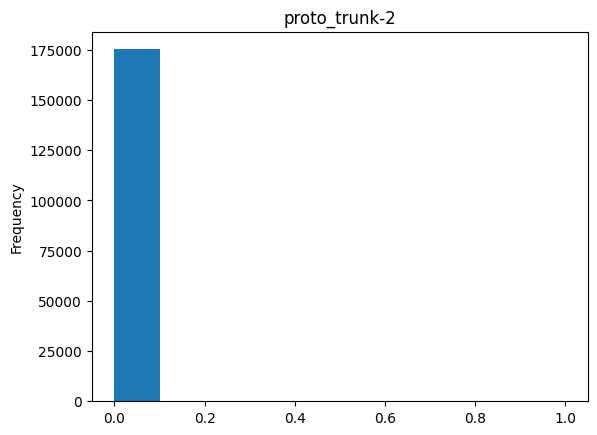

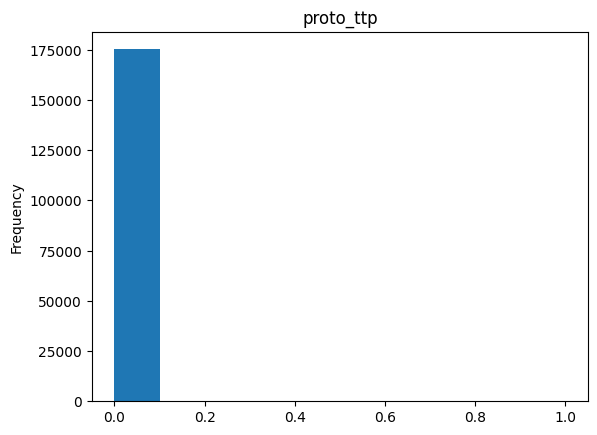

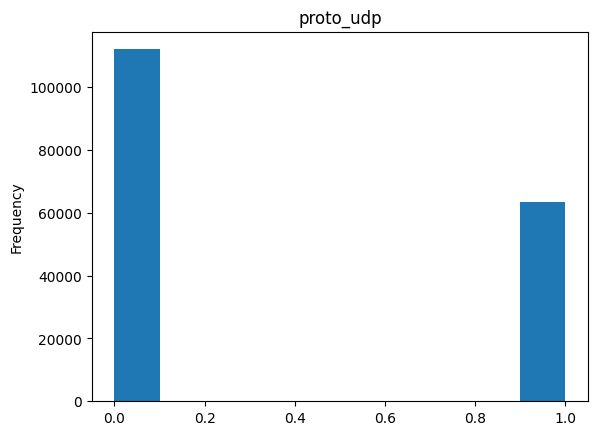

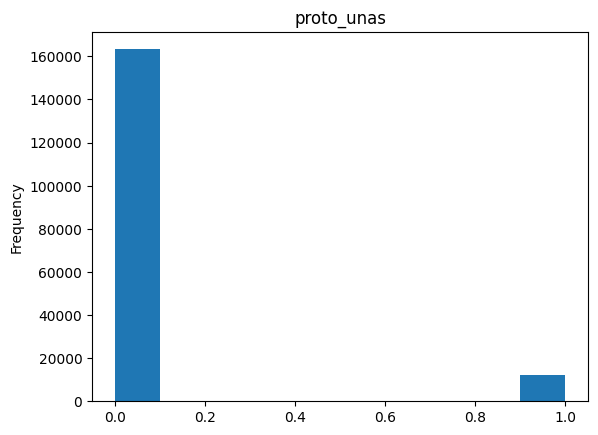

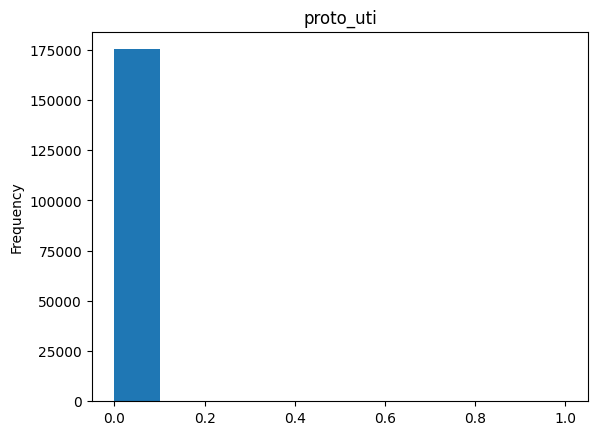

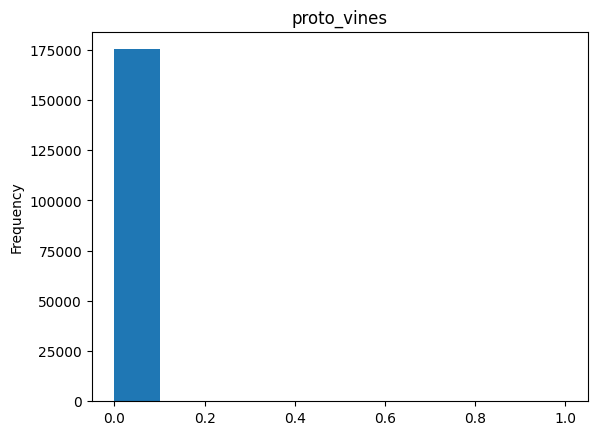

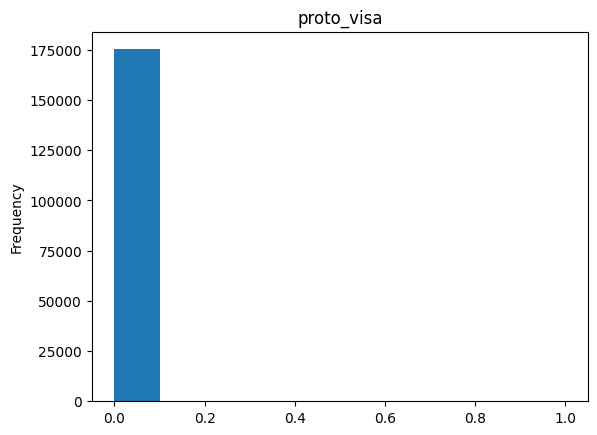

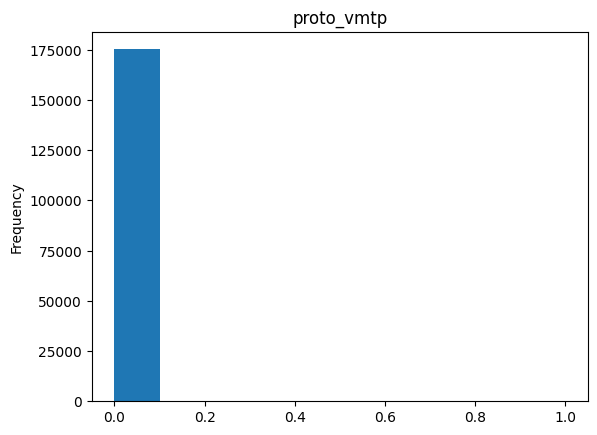

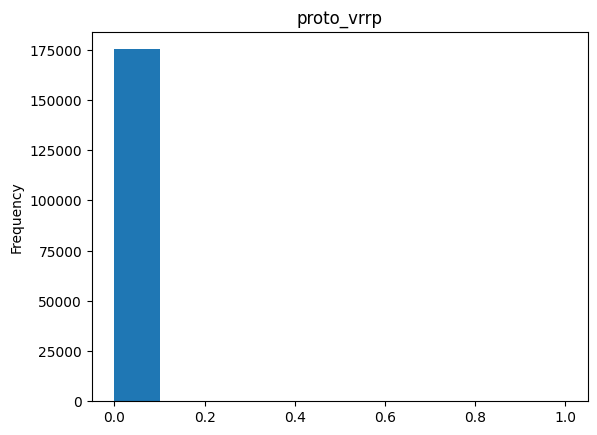

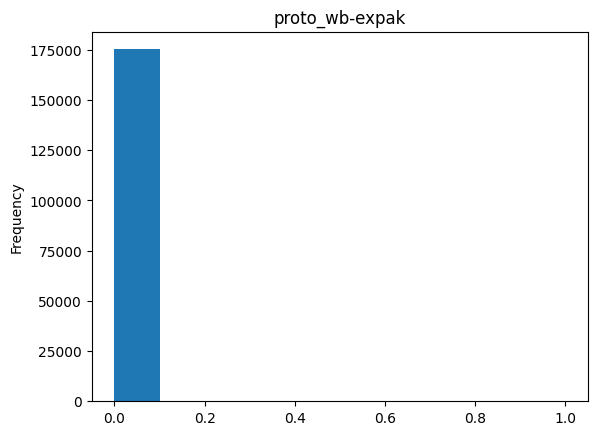

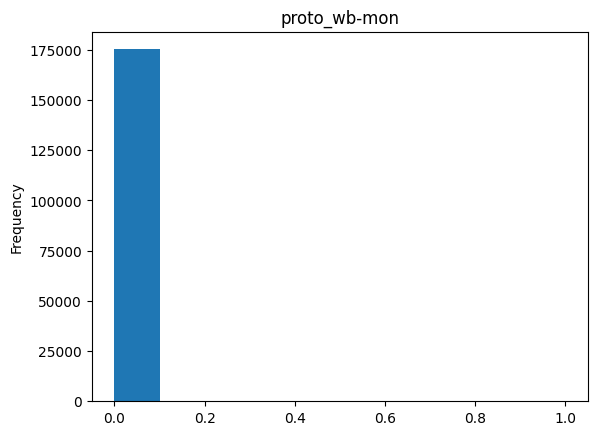

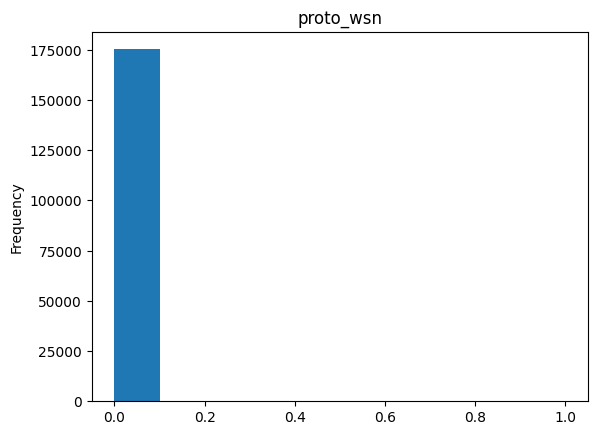

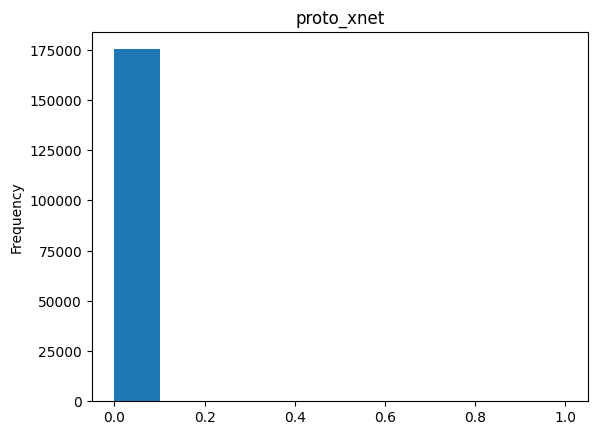

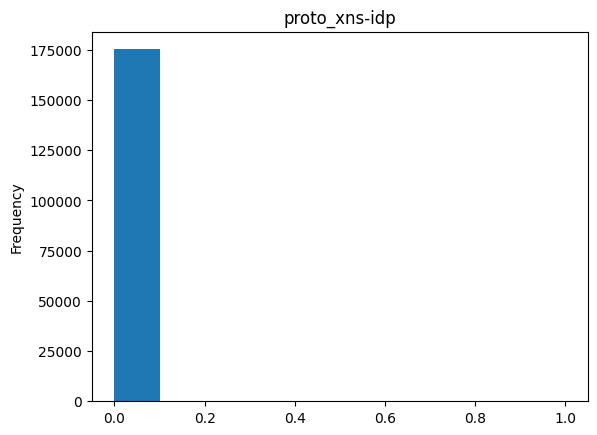

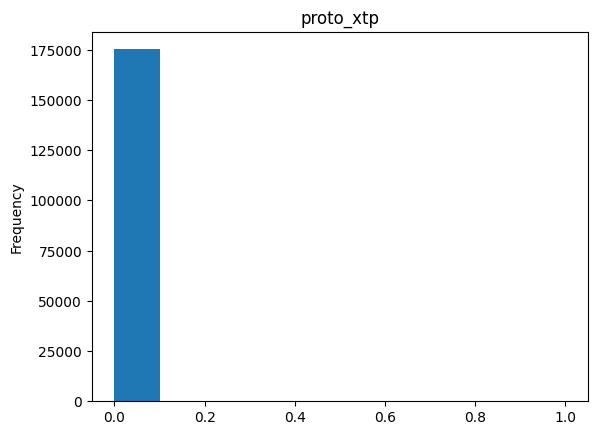

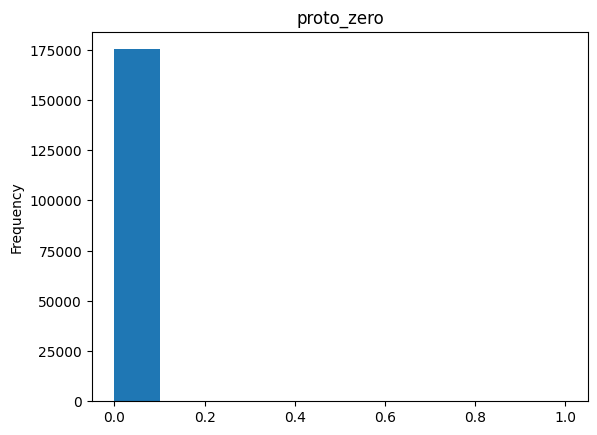

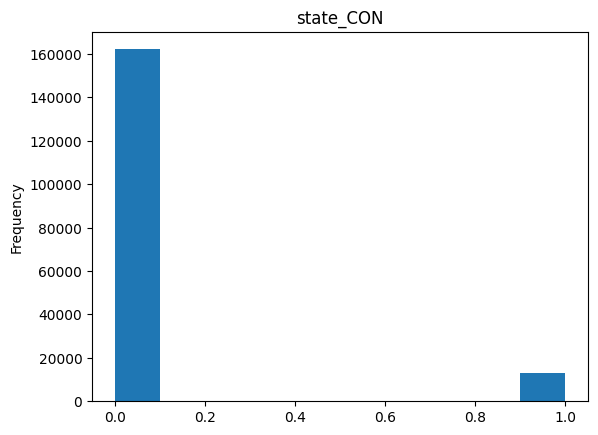

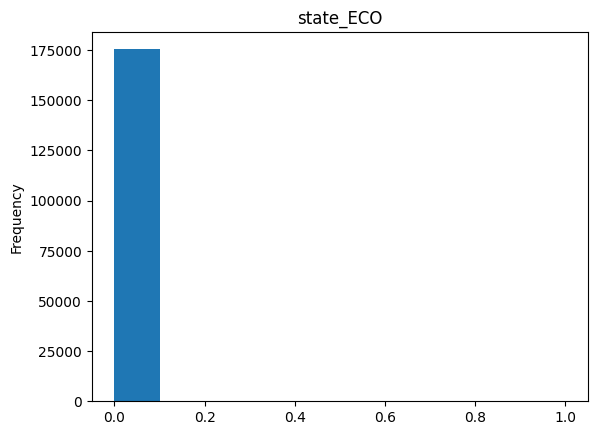

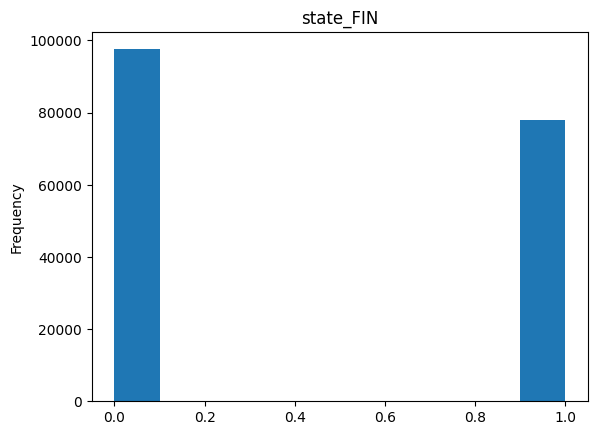

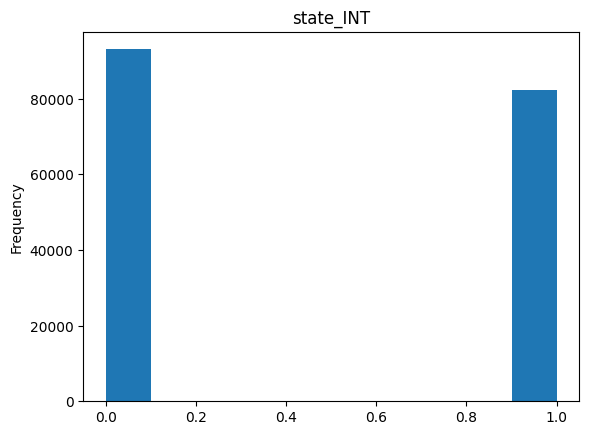

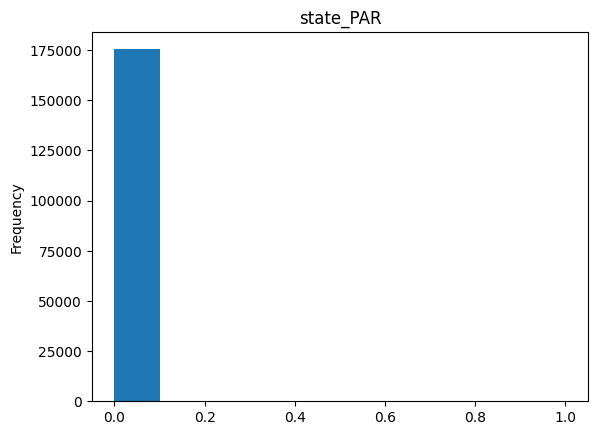

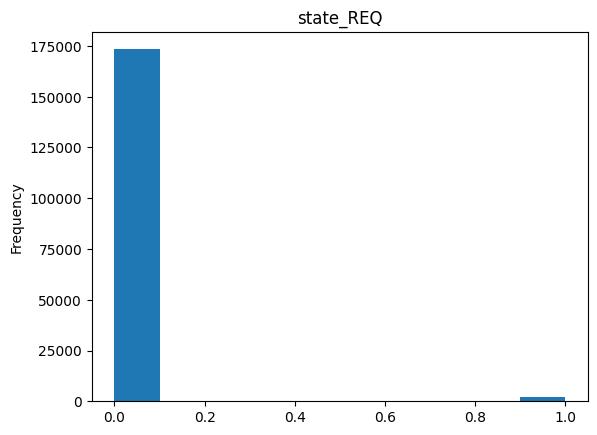

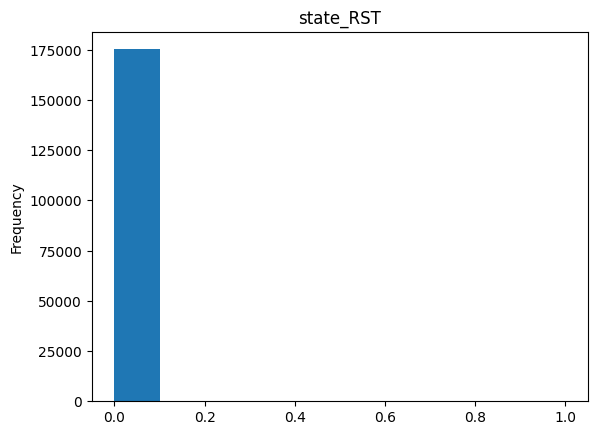

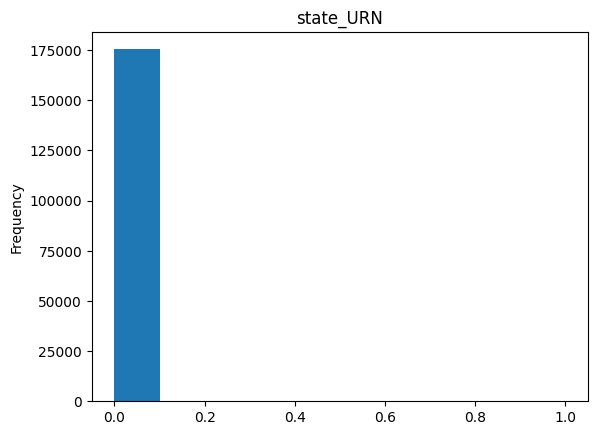

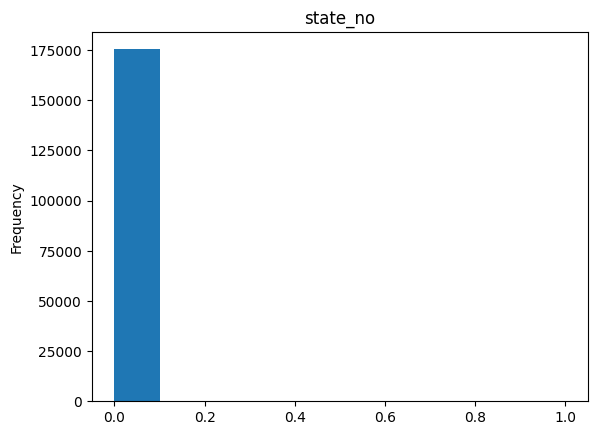

In [104]:
import matplotlib.pyplot as plt

train_plot=train.drop(columns='attack_cat')

#Iterating over the columns and create separate histogram plots

#training set plot
for column in train_plot.columns:
    train_plot[column].plot.hist(bins=10)
    plt.title(column)
    plt.show()

Test data checking is asame of the training one. So I skipped it to reach more important parts. 

In [ ]:
# import matplotlib.pyplot as plt

# test_plot=test.drop(columns='attack_cat')

# #Iterating over the columns and create separate histogram plots

# #training set plot
# for column in test_plot.columns:
#     test_plot[column].plot.hist(bins=10)
#     plt.xlabel('')
#     plt.title(column)
#     plt.show()

Now we can check the relationships between each one of variables as the last preprocessing activity by help of visualization methods

This method is very useful for grasping the most important relationships without having to go through every single combination manually. But as it is computationally expensive to compute, so it is best suited for datasets with relatively low number of variables which here we have't!

NOTE: Because of long running time I paused it

In [ ]:
import seaborn as sns
# sns.pairplot(train)
# sns.pairplot(test)

Heatmap method (not so useful for this volume of data)

In [ ]:
# corrmat=train_plot.corr()
# hm=sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=train.columns, xticklabels=train.columns, cmap="Spectral_r")
# plt.show()

Separating the labels from the training features in both train set and the test file

In [ ]:
X_train=train.loc[:, train.columns != 'attack_cat']    
y_train=train['attack_cat']

X_test=test.loc[:, test.columns != 'attack_cat']
y_test=test['attack_cat']

print(X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

autoencoder for feature extraction

In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense

#Flattening the input images
flatten_X_train=X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test=X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

#Defining the input shape
input_shape=(784,)

#Defining the size of the encoded representations
encoding_dim=32

#Defining the input layer
input_img=Input(shape=input_shape)

#Defining the encoded layer
encoded=Dense(encoding_dim, activation='relu')(input_img)

#Defining the decoded layer
decoded=Dense(784, activation='sigmoid')(encoded)

#Defining the autoencoder model
autoencoder=Model(input_img, decoded)

#Compiling the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Training the autoencoder model
autoencoder.fit(flatten_X_train, flatten_X_train, epochs=40, batch_size=200, shuffle=True, validation_data=(X_test, X_test))


Applying the trained autoencoder on the data by encoder and decoder models seperately

In [ ]:
#Creating the encoder and decoder models

encoder=Model(input_img, encoded)

encoded_input=Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]

decoder=Model(encoded_input, decoder_layer(encoded_input))

#Encoding the input data and decoding them after that
encoded_img_train=encoder.predict(flatten_X_train)
decoded_img_train=decoder.predict(encoded_img_train)

encoded_img_test=encoder.predict(X_test)
decoded_img_test=decoder.predict(encoded_img_test)

Visualizing the encoded features in comparison to the original ones (train)

In [ ]:
import matplotlib.pyplot as plt
n=15  #Number of images to visualize
plt.figure(figsize=(20, 4))
for i in range(n):
    #Original image
    ax=plt.subplot(2, n, i+1)
    plt.imshow(flatten_X_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False) #The True default mode has an unsuitable appearance and brings interference in pictures because of their near positions.
    ax.get_yaxis().set_visible(False) #So the false mode was preferred.

    #Encoded feature
    ax=plt.subplot(2, n, i+1+n)
    plt.imshow(encoded_img_train[i].reshape(8, 4)) 
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

plt.show()

Visualizing the encoded features in comparison to the original ones (test)

In [ ]:
import matplotlib.pyplot as plt

n=15  #Number of images to visualize
plt.figure(figsize=(20, 4))
for i in range(n):
    #Original image
    ax=plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False) #The True default mode has an unsuitable appearance and brings interference in pictures because of their near positions.
    ax.get_yaxis().set_visible(False) #So the false mode was preferred.

    #Encoded feature
    ax=plt.subplot(2, n, i+1+n)
    plt.imshow(encoded_img_test[i].reshape(8, 4)) 
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

plt.show()

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Defining the parameter grid for hyperparameter tuning
param_grid={'criterion':['enteropy','gini']}

#Creating the MLP classifier
forest=RandomForestClassifier(n_estimators=100, random_state=100)

#Creating the cross-validation object
cv=KFold(n_splits=5)

#Performing grid search with cross-validation
grid_search=GridSearchCV(forest, param_grid=param_grid, cv=cv, n_jobs=-1)
grid_search.fit(encoded_img_train, y_train)

#Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

In [ ]:
from sklearn.neural_network import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


forest(n_estimators = 50)
forest.fit(X_train, y_train)

y_pred_train=forest.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

y_pred_test = forest.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

tunning the hyperparameters by cross validation

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Defining the parameter grid for hyperparameter tuning
param_grid={
    'hidden_layer_sizes': [50,(25,50)],
    'learning_rate': ['constant', 'adaptive'],
    'activation': ['relu', 'logistic'],
    'batch_size': [16, 32],
    'max_iter': [25, 50],
    }

#Creating the MLP classifier
mlp=MLPClassifier()

#Creating the cross-validation object
cv=KFold(n_splits=5)

#Performing grid search with cross-validation
grid_search=GridSearchCV(mlp, param_grid=param_grid, cv=cv, n_jobs=-1)
grid_search.fit(encoded_img_train, y_train)

#Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Defining the parameter grid for hyperparameter tuning
param_grid={
    'hidden_layer_sizes': [40, 60],
    'learning_rate': ['constant', 'adaptive'],
    'activation': ['relu', 'logistic'],
    'batch_size': [10, 20],
    'max_iter': [60, 70],
    }

#Creating the MLP classifier
mlp=MLPClassifier()

#Creating the cross-validation object
cv=KFold(n_splits=5)

#Performing grid search with cross-validation
grid_search=GridSearchCV(mlp, param_grid=param_grid, cv=cv, n_jobs=-1)
grid_search.fit(encoded_img_train, y_train)

#Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Training the MLP classifier with the best parameters obtained from cross-validation

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

mlp=MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=100, learning_rate='constant', max_iter=200)
mlp.fit(encoded_img_train, y_train)

MLP_y_pred_train=mlp.predict(encoded_img_train)
print(confusion_matrix(y_train, MLP_y_pred_train))
print("train_Accuracy:", metrics.accuracy_score(y_train, MLP_y_pred_train))

MLP_y_pred_test=mlp.predict(encoded_img_test)
print(confusion_matrix(y_test, MLP_y_pred_test))
print("test_Accuracy:", metrics.accuracy_score(y_test, MLP_y_pred_test))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

mlp=MLPClassifier(activation='relu', batch_size=10, hidden_layer_sizes=100, learning_rate='adaptive', max_iter=200)
mlp.fit(encoded_img_train, y_train)

MLP_y_pred_train=mlp.predict(encoded_img_train)
print(confusion_matrix(y_train, MLP_y_pred_train))
print("train_Accuracy:", metrics.accuracy_score(y_train, MLP_y_pred_train))

MLP_y_pred_test=mlp.predict(encoded_img_test)
print(confusion_matrix(y_test, MLP_y_pred_test))
print("test_Accuracy:", metrics.accuracy_score(y_test, MLP_y_pred_test))